In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import spacy

!python -m spacy download pt_core_news_lg
pln = spacy.load('pt_core_news_lg')
pln

from spacy.matcher import Matcher

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 1.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
sujeitos_femininos = ["mulher", "mulheres", "ela", "elas", "menina", "meninas", "garota", "garotas", "senhora", "senhoras", "senhorita", "senhoritas", "moça", "moças", "donzela", "donzelas", "dama", "damas", "rainha", "rainhas", "esposa", "esposas", "namorada", "namoradas", "novinha", "novinhas", "mina", "minas"]
sujeitos_masculinos = ["homem", "homens", "ele", "eles", "menino", "meninos", "garoto", "garotos", "senhor", "senhores", "rapaz", "rapazes", "moço", "moços", "cavalheiro", "cavalheiros", "rei", "reis", "marido", "maridos", "namorado", "namorados", "novinho", "novinhos"]

In [5]:
caminho_arquivo = '/content/drive/MyDrive/TCC - UFMS/STIL/dfFamosas.csv'
dfFamosas = pd.read_csv(caminho_arquivo)
dfFamosas.head()

,Nome da Música,Nome do Artista,Ano de Lançamento,Gênero Musical,Letra da Música,Playlist
0,Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001
1,Epitáfio,Titãs,2001,Rock,Devia ter amado mais Ter chorado mais Ter vist...,Top Hits de 2001
2,Lugar Ao Sol,Charlie Brown Jr.,2001,Rock,"Que bom viver, como é bom sonhar E o que ficou...",Top Hits de 2001
3,Relicário - Ao Vivo,Cássia Eller,2001,Rock,É uma índia com colar A tarde linda que não qu...,Top Hits de 2001
4,Você Me Vira A Cabeça (Me Tira Do Sério),Alcione,2001,Samba,"Você me vira a cabeça, me tira do sério Destró...",Top Hits de 2001


#Extraindo Adjetivos, Substantivos e Verbos no Particípio no Feminino

In [6]:
matcher = Matcher(vocab=pln.vocab)

#Você + Auxiliar + Adjetivo (Feminino)
pronoun_aux_adj = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}] #Você é cheirosa.
#Sujeito + Auxiliar + Adjetivo
sujeito_aux_adj = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': 'AUX'}, {'POS': 'ADJ'}]
#Você + Auxiliar + muito/pouco + Adjetivo
pronoun_aux_adv_adj = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}] # Ela é muito [pouco] inteligente.
#Sujeito + Auxiliar + muito/pouco + Adjetivo
sujeito_aux_adv_adj = [{'LOWER': {'IN':sujeitos_femininos}}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'ADJ'}] # Ela é muito [pouco] inteligente.
#Voce + Auxiliar + Auxiliar + Adjetivo (Feminino)
pronoun_aux_aux_adj = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {'POS': 'AUX'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Sujeito + Auxiliar + Auxiliar + Adjetivo
sujeito_aux_aux_adj = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': 'AUX'}, {'POS': 'AUX'}, {'POS': 'ADJ'}]
#Voce + Auxiliar + Auxiliar + Muito/pouco + Adjetivo (Feminino)
pronoun_aux_aux_adv_adj = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Sujeito + Auxiliar + Auxiliar + muito/pouco + Adjetivo
sujeito_aux_aux_adv_adj = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'ADJ'}]
#Sujeito + Auxiliar + Verbo + Adjetivo
sujeito_aux_verb_adj = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': 'AUX'}, {"POS":"VERB"}, {'POS': 'ADJ'}]
#Sujeito + Auxiliar + Verbo + muito/pouco + Adjetivo
sujeito_aux_verb_adv_adj = [{'LOWER': {'IN':sujeitos_femininos}}, {'POS': 'AUX'}, {"POS":"VERB"}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
#Voce + Auxiliar + Verbo + Adjetivo (Feminino)
pronoun_aux_verb_adj = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {"POS":"VERB", "LOWER":"sendo"}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}] # Ele está ficando velho.
#Voce + Auxiliar + Verbo + muito/pouco + Adjetivo (Feminino)
pronoun_aux_verb_adv_adj = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {"POS":"VERB", "LOWER":"sendo"}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Sujeito + Verbo + Auxiliar + Adjetivo
sujeito_verb_aux_adj = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': 'VERB'}, {'POS': 'AUX', "LOWER":"sendo"}, {'POS': 'ADJ'}]
#Sujeito + Verbo + Auxiliar + muito/pouco + Adjetivo
sujeito_verb_aux_adv_adj = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': 'VERB'}, {'POS': 'AUX', "LOWER":"sendo"}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
#Você + Verbo + Auxiliar + Adjetivo (Feminino)
pronoun_verb_aux_adj = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'VERB'}, {'POS': 'AUX'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Você + Verbo + Auxiliar + muito/pouco + Adjetivo (Feminino)
pronoun_verb_aux_adv_adj = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'VERB'}, {'POS': 'AUX'}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Sujeito + Auxiliar(Ser/Estar) + verbo principal no particípio passado
sujeito_aux_verb = [{'LOWER': {'IN': ["você", "vocês","mulher", "mulheres", "ela", "elas", "menina", "meninas", "garota", "garotas", "senhora", "senhoras", "senhorita", "senhoritas", "moça", "moças", "donzela", "donzelas", "dama", "damas", "rainha", "rainhas", "esposa", "esposas", "namorada", "namoradas", "novinha", "novinhas", "mina", "minas"]}}, {'POS': 'AUX'}, {'POS': 'VERB', "MORPH": "Gender=Fem|Number=Sing|VerbForm=Part|Voice=Pass"}]
#Sujeito + Auxiliar(Ser/Estar) + muito/pouco + verbo principal no particípio passado
sujeito_aux_adv_verb = [{'LOWER': {'IN': ["você", "vocês","mulher", "mulheres", "ela", "elas", "menina", "meninas", "garota", "garotas", "senhora", "senhoras", "senhorita", "senhoritas", "moça", "moças", "donzela", "donzelas",  "dama", "damas", "rainha", "rainhas", "esposa", "esposas", "namorada", "namoradas", "novinha", "novinhas", "mina", "minas"]}}, {'POS': 'AUX'}, {'POS': "ADV", 'OP': '+'}, {'POS': 'VERB', "MORPH": "Gender=Fem|Number=Sing|VerbForm=Part|Voice=Pass"}]
#Sujeito + Verbo + Adjetivo / LEMMA tornar, ficar, parecer
sujeito_verb_adj = [{'LOWER': {'IN':sujeitos_femininos}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ'}]
#Sujeito + Verbo + muito/pouco + Adjetivo / LEMMA tornar, ficar, parecer
sujeito_verb_adv_adj = [{'LOWER': {'IN':sujeitos_femininos}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
#Voce + Verbo + Adjetivo / LEMMA tornar, ficar, parecer
pronoun_verb_adj = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Voce + Verbo + muito/pouco + Adjetivo / LEMMA tornar, ficar, parecer
pronoun_verb_adv_adj = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Sujeito + Adjetivo
sujeito_adj = [{'LOWER': {'IN': sujeitos_femininos}}, {"POS":"ADJ"}]
#Sujeito + Pronome +  Verbo (LEMMA) + Adjetivo / Ela se tornou bonita
sujeito_pron_verb_adj = [{'LOWER': {'IN':sujeitos_femininos}}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ'}]
#Você +Pronome +  Verbo (LEMMA) + Adjetivo / Você se tornou bonita
pronoun_pron_verb_adj = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS':'PRON', "LOWER": "se"},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Sujeito +Pronome +  Verbo (LEMMA) + Adjetivo / Ela se tornou muito bonita
sujeito_pron_verb_adv_adj = [{'LOWER':  {'IN':sujeitos_femininos}}, {'POS':'PRON', "LOWER": "se"}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
#Você +Pronome +  Verbo (LEMMA) + Adjetivo / Você se tornou muito bonita
pronoun_pron_verb_adv_adj = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Sujeito + Auxiliar + Pronome +  Verbo (LEMMA) + Adjetivo
sujeito_aux_pron_verb_adj = [{'LOWER': {'IN':sujeitos_femininos}}, {'POS': "AUX"}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ'}]
#Voce + Auxiliar + Pronome +  Verbo (LEMMA) + Adjetivo
pronoun_aux_pron_verb_adj = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': "AUX"}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ' , "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Voce + Auxiliar + Pronome +  Verbo (LEMMA) + muito/pouco + Adjetivo
pronoun_aux_pron_verb_adv_adj = [{'POS': 'PRON',"MORPH":{"IN":['Case=Nom|Number=Sing|Person=3|PronType=Prs']}},{'POS':'AUX'}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Sujeito + Auxiliar + Pronome +  Verbo (LEMMA) + muito/pouco + Adjetivo
sujeito_aux_pron_verb_adv_adj = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': "AUX"}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
#Sujeito + Verbo + Pronome + Verbo (LEMMA) + Adjetivo
sujeito_verb_pron_verb_adj = [{'LOWER': {'IN':sujeitos_femininos}}, {'POS': "VERB"}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ'}]
# Você + Verbo + Pronome +  Verbo (LEMMA) + Adjetivo
pronoun_verb_pron_verb_adj = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS':'VERB'}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
# Sujeito + Verbo + Pronome +  Verbo (LEMMA) + muito/pouco + Adjetivo
sujeito_verb_pron_verb_adv_adj = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': "VERB"}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}},{'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
# Você + Verbo + Pronome +  Verbo (LEMMA) + muito/pouco + Adjetivo
pronoun_verb_pron_verb_adv_adj = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS':'VERB'}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
# Nome proprio + aux + adj
nome_aux_adj = [{"ENT_TYPE": "PER", 'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'AUX'}, {'POS': 'ADJ'}]
#nome + Auxiliar + muito/pouco + Adjetivo
nome_aux_adv_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'ADJ'}] # Ela é muito [pouco] inteligente.
#nome + Auxiliar + Auxiliar + Adjetivo
nome_aux_aux_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'AUX'}, {'POS': 'AUX'}, {'POS': 'ADJ'}]
#nome + Auxiliar + Auxiliar + muito/pouco + Adjetivo
nome_aux_aux_adv_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'ADJ'}]
#nome + Auxiliar + Verbo + Adjetivo
nome_aux_verb_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'AUX'}, {"POS":"VERB"}, {'POS': 'ADJ'}]
#nome + Auxiliar + Verbo + muito/pouco + Adjetivo
nome_aux_verb_adv_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'AUX'}, {"POS":"VERB"}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
#nome + Verbo + Auxiliar + Adjetivo
nome_verb_aux_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'VERB'}, {'POS': 'AUX'}, {'POS': 'ADJ'}]
#nome + Verbo + Auxiliar + muito/pouco + Adjetivo
nome_verb_aux_adv_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'VERB'}, {'POS': 'AUX'}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
#nome + Auxiliar(Ser/Estar) + verbo principal no particípio passado
nome_aux_verb = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'AUX'}, {'POS': 'VERB', "MORPH": "Gender=Fem|Number=Sing|VerbForm=Part|Voice=Pass"}]
#nome + Auxiliar(Ser/Estar) + muito/pouco + verbo principal no particípio passado
nome_aux_adv_verb = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'AUX'}, {'POS': "ADV", 'OP': '+'}, {'POS': 'VERB', "MORPH": "Gender=Fem|Number=Sing|VerbForm=Part|Voice=Pass"}]
#nome + Verbo + Adjetivo / LEMMA tornar, ficar, parecer
nome_verb_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ'}]
#nome + Verbo + muito/pouco + Adjetivo / LEMMA tornar, ficar, parecer
nome_verb_adv_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
#nome + Adjetivo
nome_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {"POS":"ADJ"}]
#nome + Pronome +  Verbo (LEMMA) + Adjetivo / Ela se tornou bonita
nome_pron_verb_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ'}]
#nome +Pronome +  Verbo (LEMMA) + Adjetivo / Ela se tornou muito bonita
nome_pron_verb_adv_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
#nome + Auxiliar + Pronome +  Verbo (LEMMA) + Adjetivo
nome_aux_pron_verb_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': "AUX"}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ'}]
#nome + Auxiliar + Pronome +  Verbo (LEMMA) + muito/pouco + Adjetivo
nome_aux_pron_verb_adv_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': "AUX"}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
#nome + Verbo + Pronome + Verbo (LEMMA) + Adjetivo
nome_verb_pron_verb_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': "VERB"}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ'}]
# nome + Verbo + Pronome +  Verbo (LEMMA) + muito/pouco + Adjetivo
nome_verb_pron_verb_adv_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': "VERB"}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}},{'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]


# Adicionando os padrões
matcher.add('pronoun+aux+adj', patterns=[pronoun_aux_adj])
matcher.add('sujeito_aux_adj', patterns=[sujeito_aux_adj])
matcher.add('pronoun+aux+adv+adj', patterns=[pronoun_aux_adv_adj])
matcher.add('sujeito_aux_adv_adj', patterns=[sujeito_aux_adv_adj])
matcher.add('pronoun_aux_aux_adj ', patterns=[pronoun_aux_aux_adj])
matcher.add('sujeito_aux_aux_adj', patterns=[sujeito_aux_aux_adj])
matcher.add('pronoun_aux_aux_adv_adj', patterns=[pronoun_aux_aux_adv_adj])
matcher.add('sujeito_aux_aux_adv_adj', patterns=[sujeito_aux_aux_adv_adj])
matcher.add('sujeito_aux_verb_adj', patterns=[sujeito_aux_verb_adj])
matcher.add('sujeito_aux_verb_adv_adj', patterns=[sujeito_aux_verb_adv_adj])
matcher.add('pronoun_aux_verb_adj', patterns=[pronoun_aux_verb_adj])
matcher.add('pronoun_aux_verb_adv_adj', patterns=[pronoun_aux_verb_adv_adj])
matcher.add('sujeito_verb_aux_adj', patterns=[sujeito_verb_aux_adj])
matcher.add('sujeito_verb_aux_adv_adj', patterns=[sujeito_verb_aux_adv_adj])
matcher.add('sujeito_adj', patterns=[sujeito_adj])
matcher.add('pronoun_verb_adv_adj', patterns=[pronoun_verb_adv_adj])
matcher.add('pronoun_verb_adj', patterns=[pronoun_verb_adj])
matcher.add('sujeito_verb_adv_adj', patterns=[sujeito_verb_adv_adj])
matcher.add('sujeito_verb_adj', patterns=[sujeito_verb_adj])
matcher.add('sujeito_aux_adv_verb', patterns=[sujeito_aux_adv_verb])
matcher.add('sujeito_aux_verb', patterns=[sujeito_aux_verb])
matcher.add('sujeito_pron_verb_adj', patterns=[sujeito_pron_verb_adj])
matcher.add('pronoun_pron_verb_adj', patterns=[pronoun_pron_verb_adj])
matcher.add('sujeito_pron_verb_adv_adj', patterns=[sujeito_pron_verb_adv_adj])
matcher.add('pronoun_pron_verb_adv_adj', patterns=[pronoun_pron_verb_adv_adj])
matcher.add('pronoun_aux_pron_verb_adj', patterns=[pronoun_aux_pron_verb_adj])
matcher.add('sujeito_aux_pron_verb_adj', patterns=[sujeito_aux_pron_verb_adj])
matcher.add('pronoun_aux_pron_verb_adv_adj', patterns=[pronoun_aux_pron_verb_adv_adj])
matcher.add('sujeito_aux_pron_verb_adv_adj', patterns=[sujeito_aux_pron_verb_adv_adj])
matcher.add('sujeito_verb_pron_verb_adj', patterns=[sujeito_verb_pron_verb_adj])
matcher.add('pronoun_verb_pron_verb_adj', patterns=[pronoun_verb_pron_verb_adj])
matcher.add('pronoun_verb_pron_verb_adv_adj', patterns=[pronoun_verb_pron_verb_adv_adj])
matcher.add('sujeito_verb_pron_verb_adv_adj', patterns=[sujeito_verb_pron_verb_adv_adj])
matcher.add('nome_aux_adj', patterns=[nome_aux_adj])
matcher.add('nome_aux_adv_adj', patterns=[nome_aux_adv_adj])
matcher.add('nome_aux_aux_adj', patterns=[nome_aux_aux_adj])
matcher.add('nome_aux_aux_adv_adj', patterns=[nome_aux_aux_adv_adj])
matcher.add('nome_aux_verb_adj', patterns=[nome_aux_verb_adj])
matcher.add('nome_aux_verb_adv_adj', patterns=[nome_aux_verb_adv_adj])
matcher.add('nome_verb_aux_adj', patterns=[nome_verb_aux_adj])
matcher.add('nome_verb_aux_adv_adj', patterns=[nome_verb_aux_adv_adj])
matcher.add('nome_adj', patterns=[nome_adj])
matcher.add('nome_verb_adv_adj', patterns=[nome_verb_adv_adj])
matcher.add('nome_verb_adj', patterns=[nome_verb_adj])
matcher.add('nome_aux_adv_verb', patterns=[nome_aux_adv_verb])
matcher.add('nome_aux_verb', patterns=[nome_aux_verb])
matcher.add('nome_pron_verb_adj', patterns=[nome_pron_verb_adj])
matcher.add('nome_pron_verb_adv_adj', patterns=[nome_pron_verb_adv_adj])
matcher.add('nome_aux_pron_verb_adj', patterns=[nome_aux_pron_verb_adj])
matcher.add('nome_aux_pron_verb_adv_adj', patterns=[nome_aux_pron_verb_adv_adj])
matcher.add('nome_verb_pron_verb_adj', patterns=[nome_verb_pron_verb_adj])
matcher.add('nome_verb_pron_verb_adv_adj', patterns=[nome_verb_pron_verb_adv_adj])


In [7]:
resultados = []

for index, row in dfFamosas.iterrows():
    sentenca = str(row['Letra da Música'])
    doc = pln(sentenca)
    results = matcher(doc, as_spans=True)

    for result in results:
      if len(result) > 0:
        resultados.append({'Padrão': pln.vocab[result.label].text,
                           'Frase': result,
                           'Nome da Música': row['Nome da Música'],
                           'Nome do Artista': row['Nome do Artista'],
                           'Ano de Lançamento': row['Ano de Lançamento'],
                           'Gênero Musical': row['Gênero Musical'],
                           'Letra da Música': sentenca,
                           'Playlist': row['Playlist']})
df_adjetivos = pd.DataFrame(resultados)
df_adjetivos.head()

,Padrão,Frase,Nome da Música,Nome do Artista,Ano de Lançamento,Gênero Musical,Letra da Música,Playlist
0,sujeito_aux_adv_adj,"(ela, é, muito, sensual)",Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001
1,sujeito_aux_aux_adv_adj,"(ela, é, muito, sensual)",Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001
2,sujeito_aux_adv_adj,"(ela, é, muito, sensual)",Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001
3,sujeito_aux_aux_adv_adj,"(ela, é, muito, sensual)",Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001
4,sujeito_adj,"(Menina, bela)",Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001


In [8]:
matcher1 = Matcher(vocab=pln.vocab)

#Você + Auxiliar + Substantivo / Ela é vadia
pronoun_aux_NOUN = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}] #Você é cheirosa.
#Sujeito + Auxiliar + Substantivo
sujeito_aux_NOUN = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': 'AUX'}, {'POS': 'NOUN'}]
#Você + Auxiliar + muito/pouco + Substantivo
pronoun_aux_adv_NOUN = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}] # Ela é muito [pouco] inteligente.
#Sujeito + Auxiliar + muito/pouco + Substantivo
sujeito_aux_adv_NOUN = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'NOUN'}] # Ela é muito [pouco] inteligente.
#Voce + Auxiliar + Auxiliar + Substantivo (Feminino)
pronoun_aux_aux_NOUN = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {'POS': 'AUX'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Sujeito + Auxiliar + Auxiliar + Substantivo
sujeito_aux_aux_NOUN = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': 'AUX'}, {'POS': 'AUX'}, {'POS': 'NOUN'}]
#Voce + Auxiliar + Auxiliar + Muito/pouco + Substantivo (Feminino)
pronoun_aux_aux_adv_NOUN = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Sujeito + Auxiliar + Auxiliar + muito/pouco + Substantivo
sujeito_aux_aux_adv_NOUN = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'NOUN'}]
#Sujeito + Auxiliar + Verbo + Substantivo
sujeito_aux_verb_NOUN = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': 'AUX'}, {"POS":"VERB", "LOWER":"sendo"}, {'POS': 'NOUN'}]
#Sujeito + Auxiliar + Verbo + muito/pouco + Substantivo
sujeito_aux_verb_adv_NOUN = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': 'AUX'}, {"POS":"VERB", "LOWER":"sendo"}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
#Voce + Auxiliar + Verbo + Substantivo (Feminino)
pronoun_aux_verb_NOUN = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {"POS":"VERB", "LOWER":"sendo"}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}] # Ele está ficando velho.
#Voce + Auxiliar + Verbo + muito/pouco + Substantivo (Feminino)
pronoun_aux_verb_adv_NOUN = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {"POS":"VERB", "LOWER":"sendo"}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Sujeito + Verbo + Auxiliar + Substantivo
sujeito_verb_aux_NOUN = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': 'VERB'}, {'POS': 'AUX', "LOWER":"sendo"}, {'POS': 'NOUN'}]
#Sujeito + Verbo + Auxiliar + muito/pouco + Substantivo
sujeito_verb_aux_adv_NOUN = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': 'VERB'}, {'POS': 'AUX', "LOWER":"sendo"}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
#Você + Verbo + Auxiliar + Substantivo (Feminino)
pronoun_verb_aux_NOUN = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'VERB'}, {'POS': 'AUX'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Você + Verbo + Auxiliar + muito/pouco + Substantivo (Feminino)
pronoun_verb_aux_adv_NOUN = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'VERB'}, {'POS': 'AUX'}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Sujeito + Verbo + Substantivo / LEMMA tornar, ficar, parecer
sujeito_verb_NOUN = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN'}]
#Sujeito + Verbo + muito/pouco + Substantivo / LEMMA tornar, ficar, parecer
sujeito_verb_adv_NOUN = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
#Voce + Verbo + Substantivo / LEMMA tornar, ficar, parecer
pronoun_verb_NOUN = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Voce + Verbo + muito/pouco + Substantivo / LEMMA tornar, ficar, parecer
pronoun_verb_adv_NOUN = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Sujeito + Substantivo
sujeito_NOUN = [{'LOWER': {'IN': sujeitos_femininos}}, {"POS":"NOUN"}]
#Sujeito + Pronome +  Verbo (LEMMA) + Substantivo / Ela se tornou bonita
sujeito_pron_verb_NOUN = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN'}]
#Você +Pronome +  Verbo (LEMMA) + Substantivo / Você se tornou bonita
pronoun_pron_verb_NOUN = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS':'PRON', "LOWER": "se"},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Sujeito +Pronome +  Verbo (LEMMA) + Substantivo / Ela se tornou muito bonita
sujeito_pron_verb_adv_NOUN = [{'LOWER':  {'IN': sujeitos_femininos}}, {'POS':'PRON', "LOWER": "se"}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
#Você +Pronome +  Verbo (LEMMA) + Substantivo / Você se tornou muito bonita
pronoun_pron_verb_adv_NOUN = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Sujeito + Auxiliar + Pronome +  Verbo (LEMMA) + Substantivo
sujeito_aux_pron_verb_NOUN = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': "AUX"}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN'}]
#Voce + Auxiliar + Pronome +  Verbo (LEMMA) + Substantivo
pronoun_aux_pron_verb_NOUN = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': "AUX"}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN' , "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Voce + Auxiliar + Pronome +  Verbo (LEMMA) + muito/pouco + Substantivo
pronoun_aux_pron_verb_adv_NOUN = [{'POS': 'PRON',"MORPH":{"IN":['Case=Nom|Number=Sing|Person=3|PronType=Prs']}},{'POS':'AUX'}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
#Sujeito + Auxiliar + Pronome +  Verbo (LEMMA) + muito/pouco + Substantivo
sujeito_aux_pron_verb_adv_NOUN = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': "AUX"}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
#Sujeito + Verbo + Pronome + Verbo (LEMMA) + Substantivo
sujeito_verb_pron_verb_NOUN = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': "VERB"}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN'}]
# Você + Verbo + Pronome +  Verbo (LEMMA) + Substantivo
pronoun_verb_pron_verb_NOUN = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS':'VERB'}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
# Sujeito + Verbo + Pronome +  Verbo (LEMMA) + muito/pouco + Substantivo
sujeito_verb_pron_verb_adv_NOUN = [{'LOWER': {'IN': sujeitos_femininos}}, {'POS': "VERB"}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}},{'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
# Você + Verbo + Pronome +  Verbo (LEMMA) + muito/pouco + Substantivo
pronoun_verb_pron_verb_adv_NOUN = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS':'VERB'}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Fem|Number=Plur", "Gender=Fem|Number=Sing"]}}]
# Nome proprio + aux + NOUN
nome_aux_NOUN = [{"ENT_TYPE": "PER", 'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'AUX'}, {'POS': 'NOUN'}]
#nome + Auxiliar + muito/pouco + Substantivo
nome_aux_adv_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'NOUN'}] # Ela é muito [pouco] inteligente.
#nome + Auxiliar + Auxiliar + Substantivo
nome_aux_aux_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'AUX'}, {'POS': 'AUX'}, {'POS': 'NOUN'}]
#nome + Auxiliar + Auxiliar + muito/pouco + Substantivo
nome_aux_aux_adv_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'NOUN'}]
#nome + Auxiliar + Verbo + Substantivo
nome_aux_verb_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'AUX'}, {"POS":"VERB"}, {'POS': 'NOUN'}]
#nome + Auxiliar + Verbo + muito/pouco + Substantivo
nome_aux_verb_adv_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'AUX'}, {"POS":"VERB"}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
#nome + Verbo + Auxiliar + Substantivo
nome_verb_aux_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'VERB'}, {'POS': 'AUX'}, {'POS': 'NOUN'}]
#nome + Verbo + Auxiliar + muito/pouco + Substantivo
nome_verb_aux_adv_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'VERB'}, {'POS': 'AUX'}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
#nome + Verbo + Substantivo / LEMMA tornar, ficar, parecer
nome_verb_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN'}]
#nome + Verbo + muito/pouco + Substantivo / LEMMA tornar, ficar, parecer
nome_verb_adv_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
#nome + Substantivo
nome_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {"POS":"NOUN"}]
#nome + Pronome +  Verbo (LEMMA) + Substantivo / Ela se tornou bonita
nome_pron_verb_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN'}]
#nome +Pronome +  Verbo (LEMMA) + Substantivo / Ela se tornou muito bonita
nome_pron_verb_adv_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
#nome + Auxiliar + Pronome +  Verbo (LEMMA) + Substantivo
nome_aux_pron_verb_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': "AUX"}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN'}]
#nome + Auxiliar + Pronome +  Verbo (LEMMA) + muito/pouco + Substantivo
nome_aux_pron_verb_adv_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': "AUX"}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
#nome + Verbo + Pronome + Verbo (LEMMA) + Substantivo
nome_verb_pron_verb_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': "VERB"}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN'}]
# nome + Verbo + Pronome +  Verbo (LEMMA) + muito/pouco + Substantivo
nome_verb_pron_verb_adv_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Fem|Number=Sing']}}, {'POS': "VERB"}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}},{'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]


# Adicionando os padrões
matcher1.add('pronoun+aux+NOUN', patterns=[pronoun_aux_NOUN])
matcher1.add('sujeito_aux_NOUN', patterns=[sujeito_aux_NOUN])
matcher1.add('pronoun+aux+adv+NOUN', patterns=[pronoun_aux_adv_NOUN])
matcher1.add('sujeito_aux_adv_NOUN', patterns=[sujeito_aux_adv_NOUN])
matcher1.add('pronoun_aux_aux_NOUN ', patterns=[pronoun_aux_aux_NOUN])
matcher1.add('sujeito_aux_aux_NOUN', patterns=[sujeito_aux_aux_NOUN])
matcher1.add('pronoun_aux_aux_adv_NOUN', patterns=[pronoun_aux_aux_adv_NOUN])
matcher1.add('sujeito_aux_aux_adv_NOUN', patterns=[sujeito_aux_aux_adv_NOUN])
matcher1.add('sujeito_aux_verb_NOUN', patterns=[sujeito_aux_verb_NOUN])
matcher1.add('sujeito_aux_verb_adv_NOUN', patterns=[sujeito_aux_verb_adv_NOUN])
matcher1.add('pronoun_aux_verb_NOUN', patterns=[pronoun_aux_verb_NOUN])
matcher1.add('pronoun_aux_verb_adv_NOUN', patterns=[pronoun_aux_verb_adv_NOUN])
matcher1.add('sujeito_verb_aux_NOUN', patterns=[sujeito_verb_aux_NOUN])
matcher1.add('sujeito_verb_aux_adv_NOUN', patterns=[sujeito_verb_aux_adv_NOUN])
matcher1.add('sujeito_NOUN', patterns=[sujeito_NOUN])
matcher1.add('pronoun_verb_adv_NOUN', patterns=[pronoun_verb_adv_NOUN])
matcher1.add('pronoun_verb_NOUN', patterns=[pronoun_verb_NOUN])
matcher1.add('sujeito_verb_adv_NOUN', patterns=[sujeito_verb_adv_NOUN])
matcher1.add('sujeito_verb_NOUN', patterns=[sujeito_verb_NOUN])
matcher1.add('sujeito_aux_adv_verb', patterns=[sujeito_aux_adv_verb])
matcher1.add('sujeito_aux_verb', patterns=[sujeito_aux_verb])
matcher1.add('sujeito_pron_verb_NOUN', patterns=[sujeito_pron_verb_NOUN])
matcher1.add('pronoun_pron_verb_NOUN', patterns=[pronoun_pron_verb_NOUN])
matcher1.add('sujeito_pron_verb_adv_NOUN', patterns=[sujeito_pron_verb_adv_NOUN])
matcher1.add('pronoun_pron_verb_adv_NOUN', patterns=[pronoun_pron_verb_adv_NOUN])
matcher1.add('pronoun_aux_pron_verb_NOUN', patterns=[pronoun_aux_pron_verb_NOUN])
matcher1.add('sujeito_aux_pron_verb_NOUN', patterns=[sujeito_aux_pron_verb_NOUN])
matcher1.add('pronoun_aux_pron_verb_adv_NOUN', patterns=[pronoun_aux_pron_verb_adv_NOUN])
matcher1.add('sujeito_aux_pron_verb_adv_NOUN', patterns=[sujeito_aux_pron_verb_adv_NOUN])
matcher1.add('sujeito_verb_pron_verb_NOUN', patterns=[sujeito_verb_pron_verb_NOUN])
matcher1.add('pronoun_verb_pron_verb_NOUN', patterns=[pronoun_verb_pron_verb_NOUN])
matcher1.add('pronoun_verb_pron_verb_adv_NOUN', patterns=[pronoun_verb_pron_verb_adv_NOUN])
matcher1.add('sujeito_verb_pron_verb_adv_NOUN', patterns=[sujeito_verb_pron_verb_adv_NOUN])
matcher1.add('nome_aux_NOUN', patterns=[nome_aux_NOUN])
matcher1.add('nome_aux_adv_NOUN', patterns=[nome_aux_adv_NOUN])
matcher1.add('nome_aux_aux_NOUN', patterns=[nome_aux_aux_NOUN])
matcher1.add('nome_aux_aux_adv_NOUN', patterns=[nome_aux_aux_adv_NOUN])
matcher1.add('nome_aux_verb_NOUN', patterns=[nome_aux_verb_NOUN])
matcher1.add('nome_aux_verb_adv_NOUN', patterns=[nome_aux_verb_adv_NOUN])
matcher1.add('nome_verb_aux_NOUN', patterns=[nome_verb_aux_NOUN])
matcher1.add('nome_verb_aux_adv_NOUN', patterns=[nome_verb_aux_adv_NOUN])
matcher1.add('nome_NOUN', patterns=[nome_NOUN])
matcher1.add('nome_verb_adv_NOUN', patterns=[nome_verb_adv_NOUN])
matcher1.add('nome_verb_NOUN', patterns=[nome_verb_NOUN])
matcher1.add('nome_aux_adv_verb', patterns=[nome_aux_adv_verb])
matcher1.add('nome_aux_verb', patterns=[nome_aux_verb])
matcher1.add('nome_pron_verb_NOUN', patterns=[nome_pron_verb_NOUN])
matcher1.add('nome_pron_verb_adv_NOUN', patterns=[nome_pron_verb_adv_NOUN])
matcher1.add('nome_aux_pron_verb_NOUN', patterns=[nome_aux_pron_verb_NOUN])
matcher1.add('nome_aux_pron_verb_adv_NOUN', patterns=[nome_aux_pron_verb_adv_NOUN])
matcher1.add('nome_verb_pron_verb_NOUN', patterns=[nome_verb_pron_verb_NOUN])
matcher1.add('nome_verb_pron_verb_adv_NOUN', patterns=[nome_verb_pron_verb_adv_NOUN])


In [9]:
resultados1 = []

for index, row in dfFamosas.iterrows():
    sentenca = str(row['Letra da Música'])
    doc1 = pln(sentenca)
    results = matcher1(doc1, as_spans=True)

    for result in results:
      if len(result) > 0:
        resultados1.append({'Padrão': pln.vocab[result.label].text,
                           'Frase': result,
                           'Nome da Música': row['Nome da Música'],
                           'Nome do Artista': row['Nome do Artista'],
                           'Ano de Lançamento': row['Ano de Lançamento'],
                           'Gênero Musical': row['Gênero Musical'],
                           'Letra da Música': sentenca,
                           'Playlist': row['Playlist']})
df_substantivos = pd.DataFrame(resultados1)
df_substantivos.head()

,Padrão,Frase,Nome da Música,Nome do Artista,Ano de Lançamento,Gênero Musical,Letra da Música,Playlist
0,sujeito_aux_NOUN,"(ela, é, mulher)",Ela Vai Voltar (Todos Os Defeitos De Uma Mulhe...,Charlie Brown Jr.,2005,Rock,"Minha mente, nem sempre tão lúcida É fértil e ...",Top Hits de 2005
1,sujeito_aux_NOUN,"(ela, é, mulher)",Ela Vai Voltar (Todos Os Defeitos De Uma Mulhe...,Charlie Brown Jr.,2005,Rock,"Minha mente, nem sempre tão lúcida É fértil e ...",Top Hits de 2005
2,sujeito_NOUN,"(Ela, prima)",Envolvidão,Rael,2014,MPB,"Ela tem cores, curvas, sabores Coisas que sedu...",Top Hits de 2014
3,sujeito_NOUN,"(moça, Bate)",Ô Moça,MC Zaquin,2020,Funk,"Ai, ai, ai É, é, é, é É, ser bonzinho não tá p...",Top Hits de 2020
4,sujeito_NOUN,"(elas, Ritmo)",Hit Contagiante,Felipe Original,2019,Funk,"Ahn, fala tu que eu tô cansado Felipe Original...",Top Hits de 2020


In [10]:
resultados_feminino = pd.concat([df_adjetivos, df_substantivos])
resultados_feminino.head()

,Padrão,Frase,Nome da Música,Nome do Artista,Ano de Lançamento,Gênero Musical,Letra da Música,Playlist
0,sujeito_aux_adv_adj,"(ela, é, muito, sensual)",Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001
1,sujeito_aux_aux_adv_adj,"(ela, é, muito, sensual)",Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001
2,sujeito_aux_adv_adj,"(ela, é, muito, sensual)",Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001
3,sujeito_aux_aux_adv_adj,"(ela, é, muito, sensual)",Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001
4,sujeito_adj,"(Menina, bela)",Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001


In [11]:
resultados_feminino.shape

(528, 8)

In [12]:
resultados_feminino['Frase'] = resultados_feminino['Frase'].astype(str)
resultados_feminino['Frase'] = resultados_feminino['Frase'].str.strip()
resultados_feminino['Frase'] = resultados_feminino['Frase'].str.lower()
resultados_feminino['Frase'] = resultados_feminino['Frase'].str.replace(r'\s+', ' ', regex=True)
resultados_feminino = resultados_feminino.drop_duplicates(subset=['Frase', 'Nome da Música', 'Nome do Artista', 'Ano de Lançamento', 'Gênero Musical', 'Letra da Música'])
resultados_feminino.head()

,Padrão,Frase,Nome da Música,Nome do Artista,Ano de Lançamento,Gênero Musical,Letra da Música,Playlist
0,sujeito_aux_adv_adj,ela é muito sensual,Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001
4,sujeito_adj,menina bela,Carolina,Seu Jorge,2014,MPB,Carolina é uma menina bem difícil de esquecer ...,Top Hits de 2001
6,pronoun+aux+adj,você é diferente,Tarde Vazia (feat. Samuel Rosa) - Versão Acústica,Ira!,2004,Rock,"Pela janela vejo fumaça, vejo pessoas Na rua o...",Top Hits de 2004
7,sujeito_aux_adj,ela é linda,Rodo cotidiano,O Rappa,2003,Rock,Ô ô ô ô ô my brother Ô ô ô ô ô my brother Ô ô ...,Top Hits de 2004
9,sujeito_aux_adj,ela é guerreira,Ela Vai Voltar (Todos Os Defeitos De Uma Mulhe...,Charlie Brown Jr.,2005,Rock,"Minha mente, nem sempre tão lúcida É fértil e ...",Top Hits de 2005


In [13]:
resultados_feminino.shape

(305, 8)

In [14]:
resultados_feminino['ID'] = range(1, len(resultados_feminino) + 1)
palavras_com_id = []

for index, row in resultados_feminino.iterrows():
    frase =  str(row['Frase'])
    frase_id = row['ID']
    doc = pln(frase)

    for token in doc:
        if (token.pos_ == "ADJ" or token.pos_ == "NOUN" or (token.pos_ == "VERB" and token.morph.get("VerbForm") == ["Part"])) and token.text.lower() not in sujeitos_femininos:
            palavras_com_id.append({'ID':frase_id, 'Adjetivo': token.text})

lista = pd.DataFrame(palavras_com_id)
lista.head()

<ipython-input-14-75e72bb718a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultados_feminino['ID'] = range(1, len(resultados_feminino) + 1)


,ID,Adjetivo
0,1,sensual
1,2,bela
2,3,diferente
3,4,linda
4,5,guerreira


In [15]:
lista.shape

(293, 2)

In [49]:
palavras_remover = ["bonitão", "Estuprador", "tum", "Que", "interfona", "memo", "mochila", "jazz", "gordin", "louco", "sentarao", "solteiro"] #essas palavras estão sendo removidas manualmente por erro de classificação do POS Tagging
lista = lista[~lista['Adjetivo'].isin(palavras_remover)]

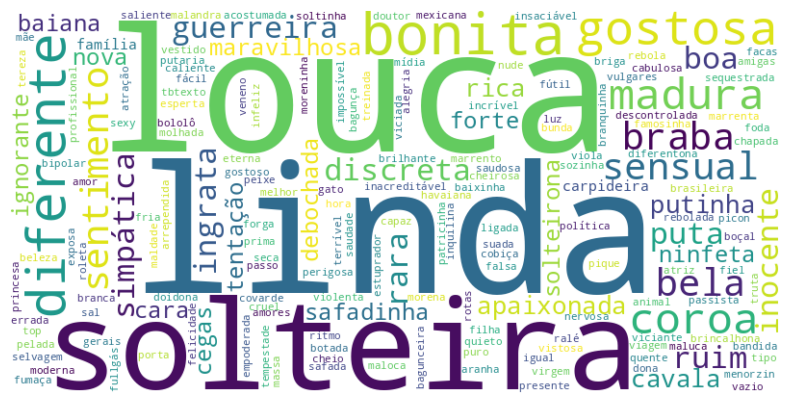

In [51]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

texto = ' '.join(lista['Adjetivo'])
nuvem_palavras = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
contagem_palavras = lista['Adjetivo'].value_counts()
ranking_adjetivos = contagem_palavras.reset_index()
ranking_adjetivos.columns = ['Adjetivo', 'Frequência']
ranking_adjetivos.head(10)


,Adjetivo,Frequência
0,linda,18
1,louca,17
2,solteira,8
3,bonita,7
4,diferente,6
5,gostosa,5
6,madura,4
7,coroa,4
8,sensual,3
9,braba,3


In [53]:
genero_e_palavras = resultados_feminino[['ID', 'Gênero Musical']].merge(lista, on='ID', how='left')
genero_e_palavras = genero_e_palavras.dropna(subset=['Adjetivo'])
contagem_por_genero = genero_e_palavras.groupby(['Gênero Musical', 'Adjetivo']).size().reset_index(name='Frequência')

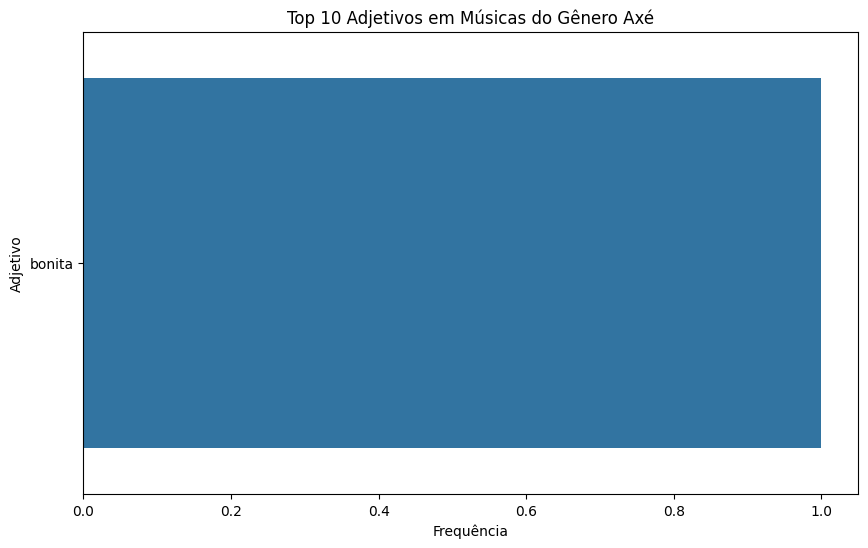

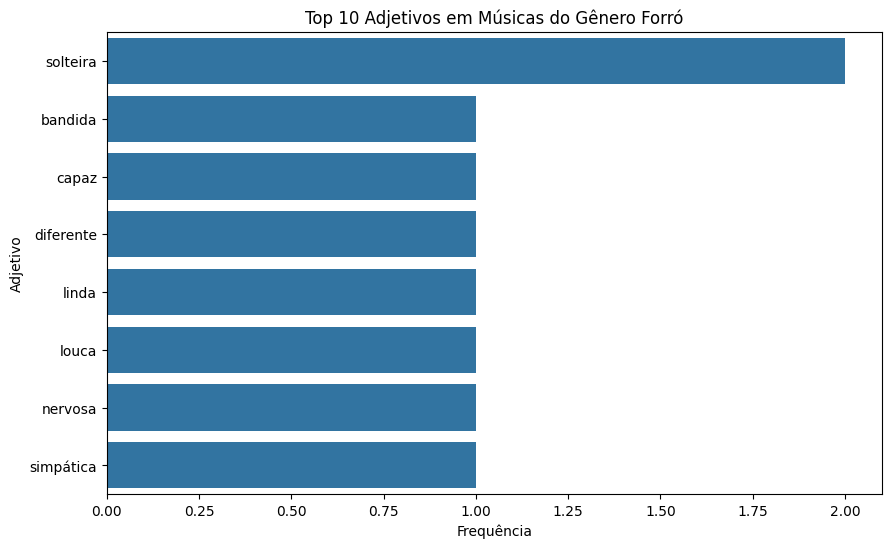

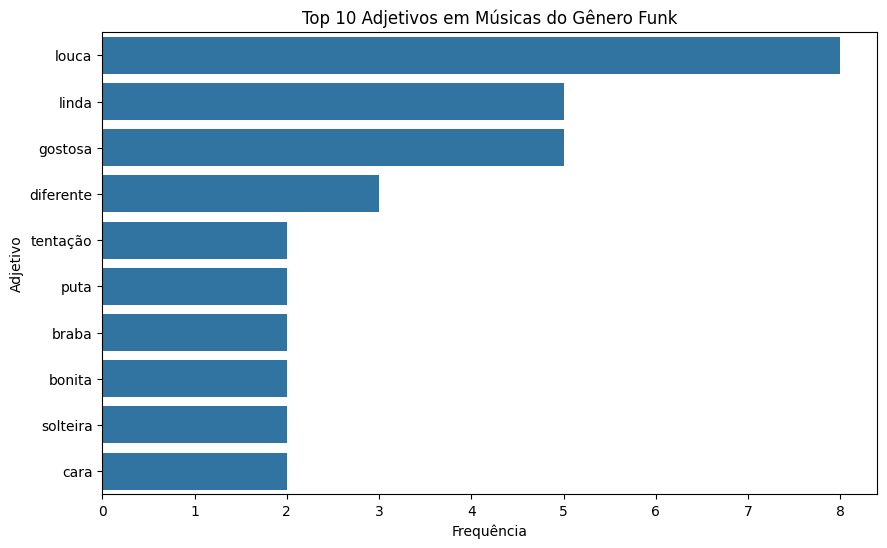

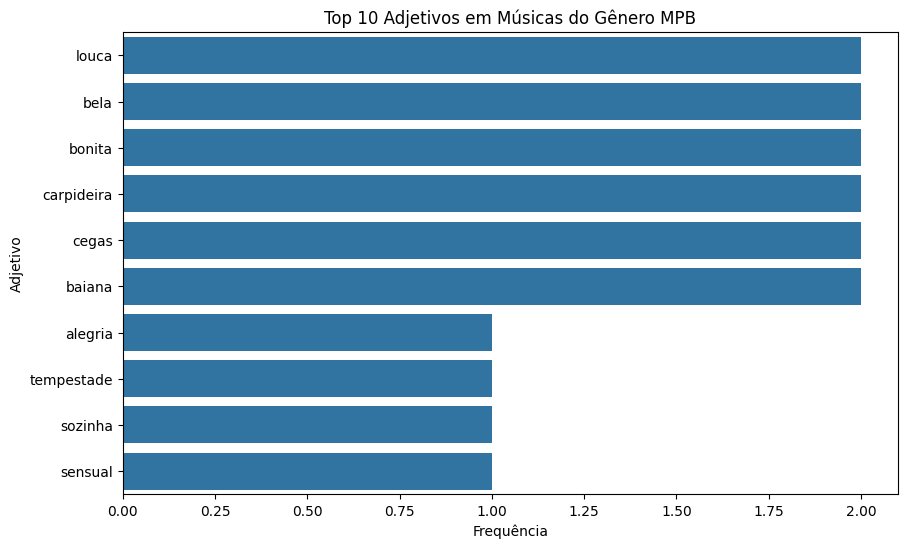

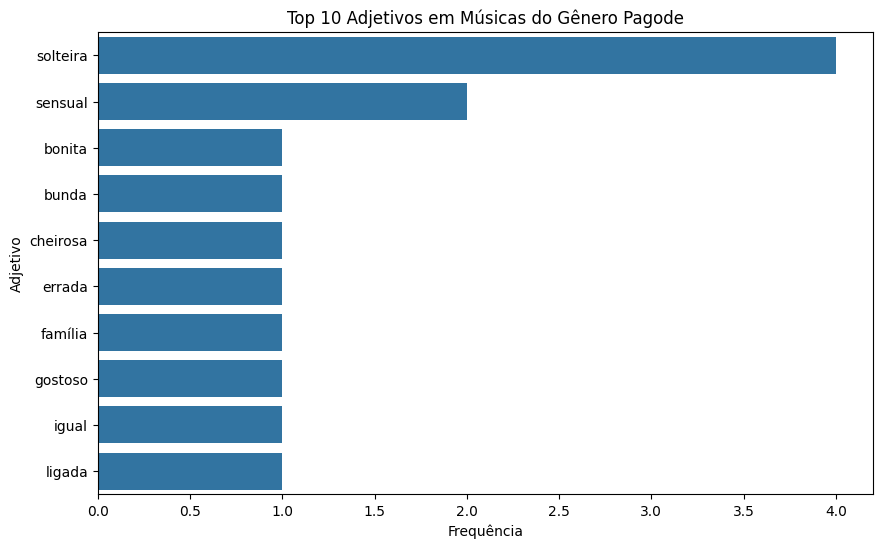

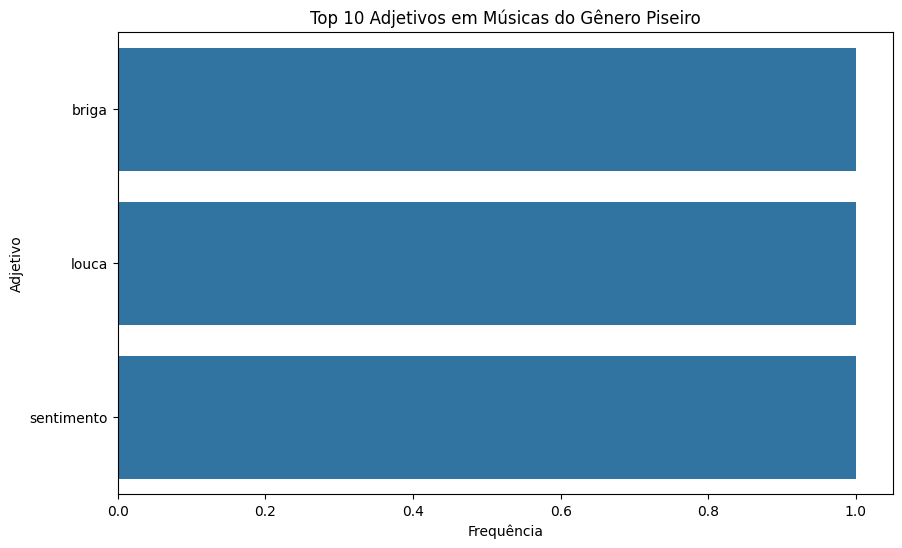

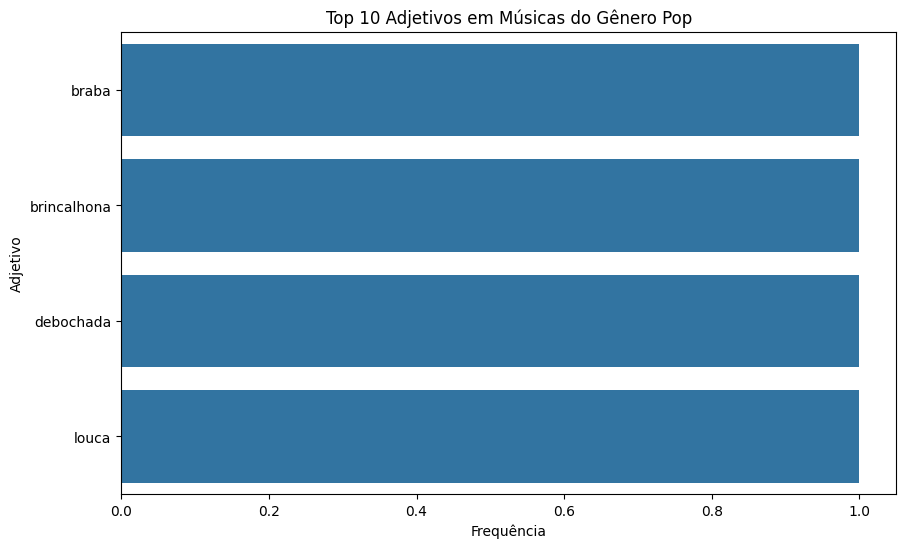

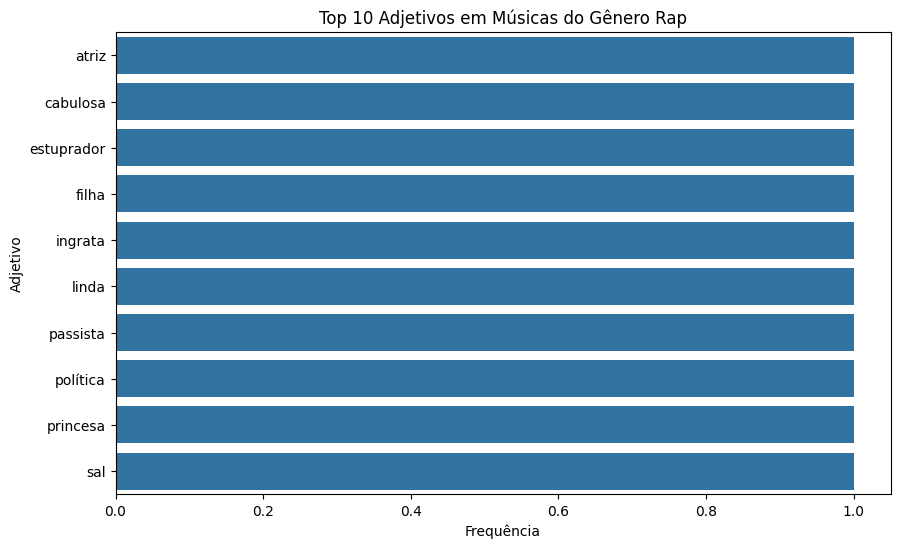

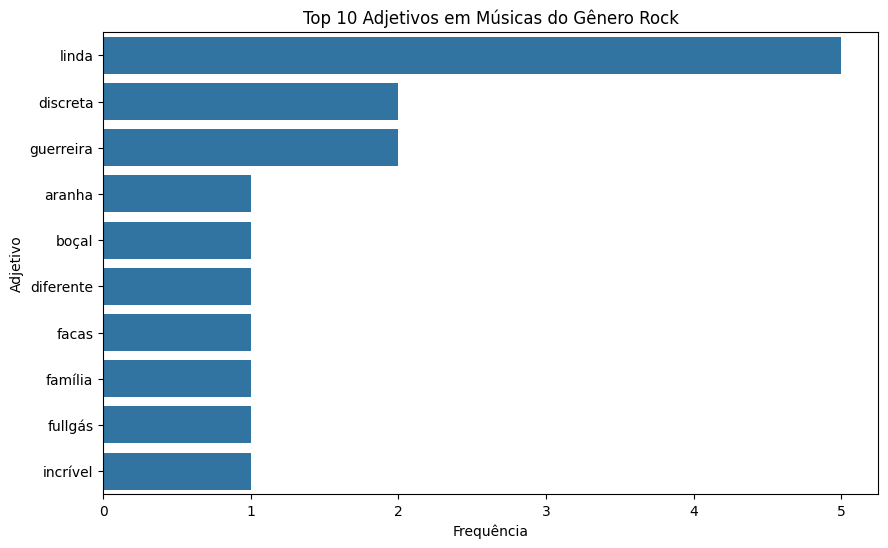

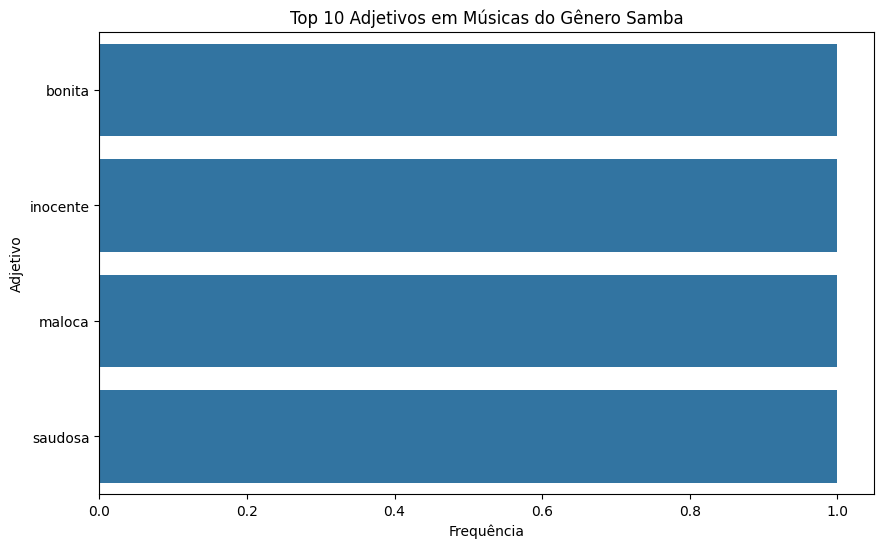

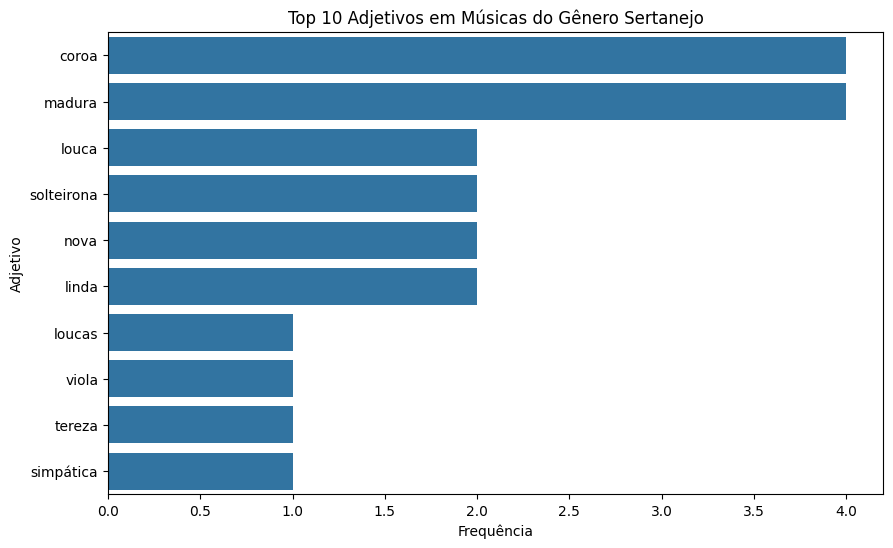

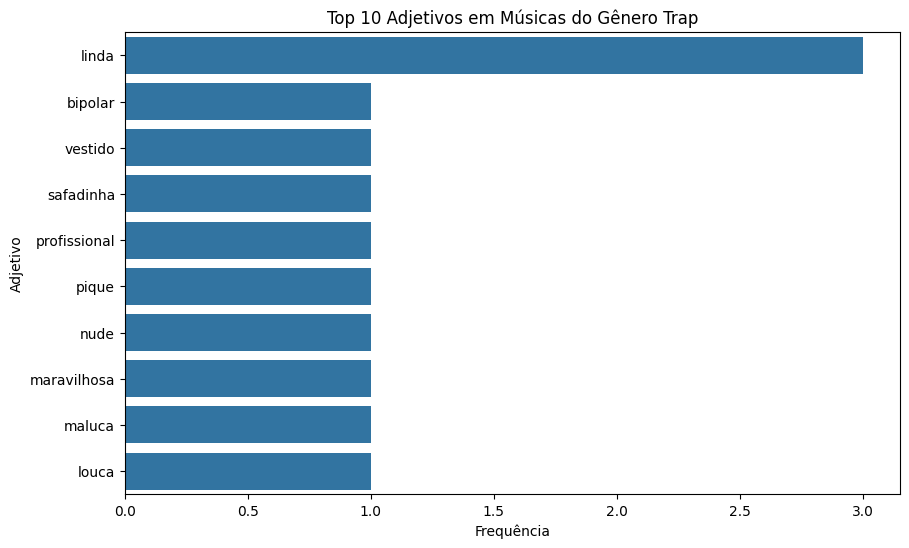

In [54]:
generos = contagem_por_genero['Gênero Musical'].unique()

for genero in generos:
    dados_genero = contagem_por_genero[contagem_por_genero['Gênero Musical'] == genero]
    dados_genero = dados_genero.sort_values(by='Frequência', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequência', y='Adjetivo', data=dados_genero)
    plt.title(f'Top 10 Adjetivos em Músicas do Gênero {genero}')
    plt.xlabel('Frequência')
    plt.ylabel('Adjetivo')
    plt.show()


#Extraindo Adjetivos, Substantivos e Verbos no Particípio no Masculino

In [21]:
matcher2 = Matcher(vocab=pln.vocab)

#Você + Auxiliar + Adjetivo (Masculino)
pronoun_aux_adj = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}] #Você é cheirosa.
#Sujeito + Auxiliar + Adjetivo
sujeito_aux_adj = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': 'AUX'}, {'POS': 'ADJ'}]
#Você + Auxiliar + muito/pouco + Adjetivo
pronoun_aux_adv_adj = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}] # Ela é muito [pouco] inteligente.
#Sujeito + Auxiliar + muito/pouco + Adjetivo
sujeito_aux_adv_adj = [{'LOWER': {'IN':sujeitos_masculinos}}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'ADJ'}] # Ela é muito [pouco] inteligente.
#Voce + Auxiliar + Auxiliar + Adjetivo (Masculino)
pronoun_aux_aux_adj = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {'POS': 'AUX'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Sujeito + Auxiliar + Auxiliar + Adjetivo
sujeito_aux_aux_adj = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': 'AUX'}, {'POS': 'AUX'}, {'POS': 'ADJ'}]
#Voce + Auxiliar + Auxiliar + Muito/pouco + Adjetivo (Masculino)
pronoun_aux_aux_adv_adj = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Sujeito + Auxiliar + Auxiliar + muito/pouco + Adjetivo
sujeito_aux_aux_adv_adj = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'ADJ'}]
#Sujeito + Auxiliar + Verbo + Adjetivo
sujeito_aux_verb_adj = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': 'AUX'}, {"POS":"VERB"}, {'POS': 'ADJ'}]
#Sujeito + Auxiliar + Verbo + muito/pouco + Adjetivo
sujeito_aux_verb_adv_adj = [{'LOWER': {'IN':sujeitos_masculinos}}, {'POS': 'AUX'}, {"POS":"VERB"}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
#Voce + Auxiliar + Verbo + Adjetivo (Masculino)
pronoun_aux_verb_adj = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {"POS":"VERB", "LOWER":"sendo"}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}] # Ele está ficando velho.
#Voce + Auxiliar + Verbo + muito/pouco + Adjetivo (Masculino)
pronoun_aux_verb_adv_adj = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {"POS":"VERB", "LOWER":"sendo"}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Sujeito + Verbo + Auxiliar + Adjetivo
sujeito_verb_aux_adj = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': 'VERB'}, {'POS': 'AUX', "LOWER":"sendo"}, {'POS': 'ADJ'}]
#Sujeito + Verbo + Auxiliar + muito/pouco + Adjetivo
sujeito_verb_aux_adv_adj = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': 'VERB'}, {'POS': 'AUX', "LOWER":"sendo"}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
#Você + Verbo + Auxiliar + Adjetivo (Masculino)
pronoun_verb_aux_adj = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'VERB'}, {'POS': 'AUX'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Você + Verbo + Auxiliar + muito/pouco + Adjetivo (Masculino)
pronoun_verb_aux_adv_adj = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'VERB'}, {'POS': 'AUX'}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Sujeito + Auxiliar(Ser/Estar) + verbo principal no particípio passado
sujeito_aux_verb = [{'LOWER': {'IN': ["você", "vocês","mulher", "mulheres", "ela", "elas", "menina", "meninas", "garota", "garotas", "senhora", "senhoras", "senhorita", "senhoritas", "moça", "moças", "donzela", "donzelas", "dama", "damas", "rainha", "rainhas", "esposa", "esposas", "namorada", "namoradas", "novinha", "novinhas", "mina", "minas"]}}, {'POS': 'AUX'}, {'POS': 'VERB', "MORPH": "Gender=Masc|Number=Sing|VerbForm=Part|Voice=Pass"}]
#Sujeito + Auxiliar(Ser/Estar) + muito/pouco + verbo principal no particípio passado
sujeito_aux_adv_verb = [{'LOWER': {'IN': ["você", "vocês","mulher", "mulheres", "ela", "elas", "menina", "meninas", "garota", "garotas", "senhora", "senhoras", "senhorita", "senhoritas", "moça", "moças", "donzela", "donzelas",  "dama", "damas", "rainha", "rainhas", "esposa", "esposas", "namorada", "namoradas", "novinha", "novinhas", "mina", "minas"]}}, {'POS': 'AUX'}, {'POS': "ADV", 'OP': '+'}, {'POS': 'VERB', "MORPH": "Gender=Masc|Number=Sing|VerbForm=Part|Voice=Pass"}]
#Sujeito + Verbo + Adjetivo / LEMMA tornar, ficar, parecer
sujeito_verb_adj = [{'LOWER': {'IN':sujeitos_masculinos}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ'}]
#Sujeito + Verbo + muito/pouco + Adjetivo / LEMMA tornar, ficar, parecer
sujeito_verb_adv_adj = [{'LOWER': {'IN':sujeitos_masculinos}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
#Voce + Verbo + Adjetivo / LEMMA tornar, ficar, parecer
pronoun_verb_adj = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Voce + Verbo + muito/pouco + Adjetivo / LEMMA tornar, ficar, parecer
pronoun_verb_adv_adj = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Sujeito + Adjetivo
sujeito_adj = [{'LOWER': {'IN': sujeitos_masculinos}}, {"POS":"ADJ"}]
#Sujeito + Pronome +  Verbo (LEMMA) + Adjetivo / Ela se tornou bonita
sujeito_pron_verb_adj = [{'LOWER': {'IN':sujeitos_masculinos}}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ'}]
#Você +Pronome +  Verbo (LEMMA) + Adjetivo / Você se tornou bonita
pronoun_pron_verb_adj = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS':'PRON', "LOWER": "se"},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Sujeito +Pronome +  Verbo (LEMMA) + Adjetivo / Ela se tornou muito bonita
sujeito_pron_verb_adv_adj = [{'LOWER':  {'IN':sujeitos_masculinos}}, {'POS':'PRON', "LOWER": "se"}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
#Você +Pronome +  Verbo (LEMMA) + Adjetivo / Você se tornou muito bonita
pronoun_pron_verb_adv_adj = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Sujeito + Auxiliar + Pronome +  Verbo (LEMMA) + Adjetivo
sujeito_aux_pron_verb_adj = [{'LOWER': {'IN':sujeitos_masculinos}}, {'POS': "AUX"}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ'}]
#Voce + Auxiliar + Pronome +  Verbo (LEMMA) + Adjetivo
pronoun_aux_pron_verb_adj = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': "AUX"}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ' , "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Voce + Auxiliar + Pronome +  Verbo (LEMMA) + muito/pouco + Adjetivo
pronoun_aux_pron_verb_adv_adj = [{'POS': 'PRON',"MORPH":{"IN":['Case=Nom|Number=Sing|Person=3|PronType=Prs']}},{'POS':'AUX'}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Sujeito + Auxiliar + Pronome +  Verbo (LEMMA) + muito/pouco + Adjetivo
sujeito_aux_pron_verb_adv_adj = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': "AUX"}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
#Sujeito + Verbo + Pronome + Verbo (LEMMA) + Adjetivo
sujeito_verb_pron_verb_adj = [{'LOWER': {'IN':sujeitos_masculinos}}, {'POS': "VERB"}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ'}]
# Você + Verbo + Pronome +  Verbo (LEMMA) + Adjetivo
pronoun_verb_pron_verb_adj = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS':'VERB'}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
# Sujeito + Verbo + Pronome +  Verbo (LEMMA) + muito/pouco + Adjetivo
sujeito_verb_pron_verb_adv_adj = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': "VERB"}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}},{'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
# Você + Verbo + Pronome +  Verbo (LEMMA) + muito/pouco + Adjetivo
pronoun_verb_pron_verb_adv_adj = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS':'VERB'}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
# Nome proprio + aux + adj
nome_aux_adj = [{"ENT_TYPE": "PER", 'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'AUX'}, {'POS': 'ADJ'}]
#nome + Auxiliar + muito/pouco + Adjetivo
nome_aux_adv_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'ADJ'}] # Ela é muito [pouco] inteligente.
#nome + Auxiliar + Auxiliar + Adjetivo
nome_aux_aux_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'AUX'}, {'POS': 'AUX'}, {'POS': 'ADJ'}]
#nome + Auxiliar + Auxiliar + muito/pouco + Adjetivo
nome_aux_aux_adv_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'ADJ'}]
#nome + Auxiliar + Verbo + Adjetivo
nome_aux_verb_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'AUX'}, {"POS":"VERB"}, {'POS': 'ADJ'}]
#nome + Auxiliar + Verbo + muito/pouco + Adjetivo
nome_aux_verb_adv_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'AUX'}, {"POS":"VERB"}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
#nome + Verbo + Auxiliar + Adjetivo
nome_verb_aux_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'VERB'}, {'POS': 'AUX'}, {'POS': 'ADJ'}]
#nome + Verbo + Auxiliar + muito/pouco + Adjetivo
nome_verb_aux_adv_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'VERB'}, {'POS': 'AUX'}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
#nome + Auxiliar(Ser/Estar) + verbo principal no particípio passado
nome_aux_verb = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'AUX'}, {'POS': 'VERB', "MORPH": "Gender=Masc|Number=Sing|VerbForm=Part|Voice=Pass"}]
#nome + Auxiliar(Ser/Estar) + muito/pouco + verbo principal no particípio passado
nome_aux_adv_verb = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'AUX'}, {'POS': "ADV", 'OP': '+'}, {'POS': 'VERB', "MORPH": "Gender=Masc|Number=Sing|VerbForm=Part|Voice=Pass"}]
#nome + Verbo + Adjetivo / LEMMA tornar, ficar, parecer
nome_verb_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ'}]
#nome + Verbo + muito/pouco + Adjetivo / LEMMA tornar, ficar, parecer
nome_verb_adv_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
#nome + Adjetivo
nome_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {"POS":"ADJ"}]
#nome + Pronome +  Verbo (LEMMA) + Adjetivo / Ela se tornou bonita
nome_pron_verb_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ'}]
#nome +Pronome +  Verbo (LEMMA) + Adjetivo / Ela se tornou muito bonita
nome_pron_verb_adv_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
#nome + Auxiliar + Pronome +  Verbo (LEMMA) + Adjetivo
nome_aux_pron_verb_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': "AUX"}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ'}]
#nome + Auxiliar + Pronome +  Verbo (LEMMA) + muito/pouco + Adjetivo
nome_aux_pron_verb_adv_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': "AUX"}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]
#nome + Verbo + Pronome + Verbo (LEMMA) + Adjetivo
nome_verb_pron_verb_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': "VERB"}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'ADJ'}]
# nome + Verbo + Pronome +  Verbo (LEMMA) + muito/pouco + Adjetivo
nome_verb_pron_verb_adv_adj = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': "VERB"}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}},{'POS': "ADV", 'OP': '+'}, {'POS': 'ADJ'}]


# Adicionando os padrões
matcher2.add('pronoun+aux+adj', patterns=[pronoun_aux_adj])
matcher2.add('sujeito_aux_adj', patterns=[sujeito_aux_adj])
matcher2.add('pronoun+aux+adv+adj', patterns=[pronoun_aux_adv_adj])
matcher2.add('sujeito_aux_adv_adj', patterns=[sujeito_aux_adv_adj])
matcher2.add('pronoun_aux_aux_adj ', patterns=[pronoun_aux_aux_adj])
matcher2.add('sujeito_aux_aux_adj', patterns=[sujeito_aux_aux_adj])
matcher2.add('pronoun_aux_aux_adv_adj', patterns=[pronoun_aux_aux_adv_adj])
matcher2.add('sujeito_aux_aux_adv_adj', patterns=[sujeito_aux_aux_adv_adj])
matcher2.add('sujeito_aux_verb_adj', patterns=[sujeito_aux_verb_adj])
matcher2.add('sujeito_aux_verb_adv_adj', patterns=[sujeito_aux_verb_adv_adj])
matcher2.add('pronoun_aux_verb_adj', patterns=[pronoun_aux_verb_adj])
matcher2.add('pronoun_aux_verb_adv_adj', patterns=[pronoun_aux_verb_adv_adj])
matcher2.add('sujeito_verb_aux_adj', patterns=[sujeito_verb_aux_adj])
matcher2.add('sujeito_verb_aux_adv_adj', patterns=[sujeito_verb_aux_adv_adj])
matcher2.add('sujeito_adj', patterns=[sujeito_adj])
matcher2.add('pronoun_verb_adv_adj', patterns=[pronoun_verb_adv_adj])
matcher2.add('pronoun_verb_adj', patterns=[pronoun_verb_adj])
matcher2.add('sujeito_verb_adv_adj', patterns=[sujeito_verb_adv_adj])
matcher2.add('sujeito_verb_adj', patterns=[sujeito_verb_adj])
matcher2.add('sujeito_aux_adv_verb', patterns=[sujeito_aux_adv_verb])
matcher2.add('sujeito_aux_verb', patterns=[sujeito_aux_verb])
matcher2.add('sujeito_pron_verb_adj', patterns=[sujeito_pron_verb_adj])
matcher2.add('pronoun_pron_verb_adj', patterns=[pronoun_pron_verb_adj])
matcher2.add('sujeito_pron_verb_adv_adj', patterns=[sujeito_pron_verb_adv_adj])
matcher2.add('pronoun_pron_verb_adv_adj', patterns=[pronoun_pron_verb_adv_adj])
matcher2.add('pronoun_aux_pron_verb_adj', patterns=[pronoun_aux_pron_verb_adj])
matcher2.add('sujeito_aux_pron_verb_adj', patterns=[sujeito_aux_pron_verb_adj])
matcher2.add('pronoun_aux_pron_verb_adv_adj', patterns=[pronoun_aux_pron_verb_adv_adj])
matcher2.add('sujeito_aux_pron_verb_adv_adj', patterns=[sujeito_aux_pron_verb_adv_adj])
matcher2.add('sujeito_verb_pron_verb_adj', patterns=[sujeito_verb_pron_verb_adj])
matcher2.add('pronoun_verb_pron_verb_adj', patterns=[pronoun_verb_pron_verb_adj])
matcher2.add('pronoun_verb_pron_verb_adv_adj', patterns=[pronoun_verb_pron_verb_adv_adj])
matcher2.add('sujeito_verb_pron_verb_adv_adj', patterns=[sujeito_verb_pron_verb_adv_adj])
matcher2.add('nome_aux_adj', patterns=[nome_aux_adj])
matcher2.add('nome_aux_adv_adj', patterns=[nome_aux_adv_adj])
matcher2.add('nome_aux_aux_adj', patterns=[nome_aux_aux_adj])
matcher2.add('nome_aux_aux_adv_adj', patterns=[nome_aux_aux_adv_adj])
matcher2.add('nome_aux_verb_adj', patterns=[nome_aux_verb_adj])
matcher2.add('nome_aux_verb_adv_adj', patterns=[nome_aux_verb_adv_adj])
matcher2.add('nome_verb_aux_adj', patterns=[nome_verb_aux_adj])
matcher2.add('nome_verb_aux_adv_adj', patterns=[nome_verb_aux_adv_adj])
matcher2.add('nome_adj', patterns=[nome_adj])
matcher2.add('nome_verb_adv_adj', patterns=[nome_verb_adv_adj])
matcher2.add('nome_verb_adj', patterns=[nome_verb_adj])
matcher2.add('nome_aux_adv_verb', patterns=[nome_aux_adv_verb])
matcher2.add('nome_aux_verb', patterns=[nome_aux_verb])
matcher2.add('nome_pron_verb_adj', patterns=[nome_pron_verb_adj])
matcher2.add('nome_pron_verb_adv_adj', patterns=[nome_pron_verb_adv_adj])
matcher2.add('nome_aux_pron_verb_adj', patterns=[nome_aux_pron_verb_adj])
matcher2.add('nome_aux_pron_verb_adv_adj', patterns=[nome_aux_pron_verb_adv_adj])
matcher2.add('nome_verb_pron_verb_adj', patterns=[nome_verb_pron_verb_adj])
matcher2.add('nome_verb_pron_verb_adv_adj', patterns=[nome_verb_pron_verb_adv_adj])


In [ ]:
resultadosMasc = []

for index, row in dfFamosas.iterrows():
    sentenca = str(row['Letra da Música'])
    doc = pln(sentenca)
    results = matcher2(doc, as_spans=True)

    for result in results:
      if len(result) > 0:
        resultadosMasc.append({'Padrão': pln.vocab[result.label].text,
                           'Frase': result,
                           'Nome da Música': row['Nome da Música'],
                           'Nome do Artista': row['Nome do Artista'],
                           'Ano de Lançamento': row['Ano de Lançamento'],
                           'Gênero Musical': row['Gênero Musical'],
                           'Letra da Música': sentenca,
                           'Playlist': row['Playlist']})
df_adjetivosMasc = pd.DataFrame(resultadosMasc)
df_adjetivosMasc.head()

In [ ]:
matcher4 = Matcher(vocab=pln.vocab)

#Você + Auxiliar + Substantivo / Ela é vadia
pronoun_aux_NOUN = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}] #Você é cheirosa.
#Sujeito + Auxiliar + Substantivo
sujeito_aux_NOUN = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': 'AUX'}, {'POS': 'NOUN'}]
#Você + Auxiliar + muito/pouco + Substantivo
pronoun_aux_adv_NOUN = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}] # Ela é muito [pouco] inteligente.
#Sujeito + Auxiliar + muito/pouco + Substantivo
sujeito_aux_adv_NOUN = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'NOUN'}] # Ela é muito [pouco] inteligente.
#Voce + Auxiliar + Auxiliar + Substantivo (Mascinino)
pronoun_aux_aux_NOUN = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {'POS': 'AUX'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Sujeito + Auxiliar + Auxiliar + Substantivo
sujeito_aux_aux_NOUN = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': 'AUX'}, {'POS': 'AUX'}, {'POS': 'NOUN'}]
#Voce + Auxiliar + Auxiliar + Muito/pouco + Substantivo (Mascinino)
pronoun_aux_aux_adv_NOUN = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Sujeito + Auxiliar + Auxiliar + muito/pouco + Substantivo
sujeito_aux_aux_adv_NOUN = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'NOUN'}]
#Sujeito + Auxiliar + Verbo + Substantivo
sujeito_aux_verb_NOUN = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': 'AUX'}, {"POS":"VERB", "LOWER":"sendo"}, {'POS': 'NOUN'}]
#Sujeito + Auxiliar + Verbo + muito/pouco + Substantivo
sujeito_aux_verb_adv_NOUN = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': 'AUX'}, {"POS":"VERB", "LOWER":"sendo"}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
#Voce + Auxiliar + Verbo + Substantivo (Mascinino)
pronoun_aux_verb_NOUN = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {"POS":"VERB", "LOWER":"sendo"}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}] # Ele está ficando velho.
#Voce + Auxiliar + Verbo + muito/pouco + Substantivo (Mascinino)
pronoun_aux_verb_adv_NOUN = [{'POS': 'PRON', "MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'AUX'}, {"POS":"VERB", "LOWER":"sendo"}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Sujeito + Verbo + Auxiliar + Substantivo
sujeito_verb_aux_NOUN = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': 'VERB'}, {'POS': 'AUX', "LOWER":"sendo"}, {'POS': 'NOUN'}]
#Sujeito + Verbo + Auxiliar + muito/pouco + Substantivo
sujeito_verb_aux_adv_NOUN = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': 'VERB'}, {'POS': 'AUX', "LOWER":"sendo"}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
#Você + Verbo + Auxiliar + Substantivo (Mascinino)
pronoun_verb_aux_NOUN = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'VERB'}, {'POS': 'AUX'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Você + Verbo + Auxiliar + muito/pouco + Substantivo (Mascinino)
pronoun_verb_aux_adv_NOUN = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'VERB'}, {'POS': 'AUX'}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Sujeito + Verbo + Substantivo / LEMMA tornar, ficar, parecer
sujeito_verb_NOUN = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN'}]
#Sujeito + Verbo + muito/pouco + Substantivo / LEMMA tornar, ficar, parecer
sujeito_verb_adv_NOUN = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
#Voce + Verbo + Substantivo / LEMMA tornar, ficar, parecer
pronoun_verb_NOUN = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Voce + Verbo + muito/pouco + Substantivo / LEMMA tornar, ficar, parecer
pronoun_verb_adv_NOUN = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Sujeito + Substantivo
sujeito_NOUN = [{'LOWER': {'IN': sujeitos_masculinos}}, {"POS":"NOUN"}]
#Sujeito + Pronome +  Verbo (LEMMA) + Substantivo / Ela se tornou bonita
sujeito_pron_verb_NOUN = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN'}]
#Você +Pronome +  Verbo (LEMMA) + Substantivo / Você se tornou bonita
pronoun_pron_verb_NOUN = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS':'PRON', "LOWER": "se"},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Sujeito +Pronome +  Verbo (LEMMA) + Substantivo / Ela se tornou muito bonita
sujeito_pron_verb_adv_NOUN = [{'LOWER':  {'IN': sujeitos_masculinos}}, {'POS':'PRON', "LOWER": "se"}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
#Você +Pronome +  Verbo (LEMMA) + Substantivo / Você se tornou muito bonita
pronoun_pron_verb_adv_NOUN = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Sujeito + Auxiliar + Pronome +  Verbo (LEMMA) + Substantivo
sujeito_aux_pron_verb_NOUN = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': "AUX"}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN'}]
#Voce + Auxiliar + Pronome +  Verbo (LEMMA) + Substantivo
pronoun_aux_pron_verb_NOUN = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS': "AUX"}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN' , "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Voce + Auxiliar + Pronome +  Verbo (LEMMA) + muito/pouco + Substantivo
pronoun_aux_pron_verb_adv_NOUN = [{'POS': 'PRON',"MORPH":{"IN":['Case=Nom|Number=Sing|Person=3|PronType=Prs']}},{'POS':'AUX'}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
#Sujeito + Auxiliar + Pronome +  Verbo (LEMMA) + muito/pouco + Substantivo
sujeito_aux_pron_verb_adv_NOUN = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': "AUX"}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
#Sujeito + Verbo + Pronome + Verbo (LEMMA) + Substantivo
sujeito_verb_pron_verb_NOUN = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': "VERB"}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN'}]
# Você + Verbo + Pronome +  Verbo (LEMMA) + Substantivo
pronoun_verb_pron_verb_NOUN = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS':'VERB'}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
# Sujeito + Verbo + Pronome +  Verbo (LEMMA) + muito/pouco + Substantivo
sujeito_verb_pron_verb_adv_NOUN = [{'LOWER': {'IN': sujeitos_masculinos}}, {'POS': "VERB"}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}},{'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
# Você + Verbo + Pronome +  Verbo (LEMMA) + muito/pouco + Substantivo
pronoun_verb_pron_verb_adv_NOUN = [{'POS': 'PRON',"MORPH": {"IN": ['Case=Nom|Number=Sing|Person=3|PronType=Prs']}}, {'POS':'VERB'}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN', "MORPH": {"IN":["Gender=Masc|Number=Plur", "Gender=Masc|Number=Sing"]}}]
# Nome proprio + aux + NOUN
nome_aux_NOUN = [{"ENT_TYPE": "PER", 'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'AUX'}, {'POS': 'NOUN'}]
#nome + Auxiliar + muito/pouco + Substantivo
nome_aux_adv_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'NOUN'}] # Ela é muito [pouco] inteligente.
#nome + Auxiliar + Auxiliar + Substantivo
nome_aux_aux_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'AUX'}, {'POS': 'AUX'}, {'POS': 'NOUN'}]
#nome + Auxiliar + Auxiliar + muito/pouco + Substantivo
nome_aux_aux_adv_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'AUX'}, {'POS': 'ADV', 'OP': '+'}, {'POS': 'NOUN'}]
#nome + Auxiliar + Verbo + Substantivo
nome_aux_verb_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'AUX'}, {"POS":"VERB"}, {'POS': 'NOUN'}]
#nome + Auxiliar + Verbo + muito/pouco + Substantivo
nome_aux_verb_adv_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'AUX'}, {"POS":"VERB"}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
#nome + Verbo + Auxiliar + Substantivo
nome_verb_aux_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'VERB'}, {'POS': 'AUX'}, {'POS': 'NOUN'}]
#nome + Verbo + Auxiliar + muito/pouco + Substantivo
nome_verb_aux_adv_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'VERB'}, {'POS': 'AUX'}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
#nome + Verbo + Substantivo / LEMMA tornar, ficar, parecer
nome_verb_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN'}]
#nome + Verbo + muito/pouco + Substantivo / LEMMA tornar, ficar, parecer
nome_verb_adv_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
#nome + Substantivo
nome_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {"POS":"NOUN"}]
#nome + Pronome +  Verbo (LEMMA) + Substantivo / Ela se tornou bonita
nome_pron_verb_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN'}]
#nome +Pronome +  Verbo (LEMMA) + Substantivo / Ela se tornou muito bonita
nome_pron_verb_adv_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
#nome + Auxiliar + Pronome +  Verbo (LEMMA) + Substantivo
nome_aux_pron_verb_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': "AUX"}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN'}]
#nome + Auxiliar + Pronome +  Verbo (LEMMA) + muito/pouco + Substantivo
nome_aux_pron_verb_adv_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': "AUX"}, {'POS':'PRON'}, {'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]
#nome + Verbo + Pronome + Verbo (LEMMA) + Substantivo
nome_verb_pron_verb_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': "VERB"}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}}, {'POS': 'NOUN'}]
# nome + Verbo + Pronome +  Verbo (LEMMA) + muito/pouco + Substantivo
nome_verb_pron_verb_adv_NOUN = [{"ENT_TYPE": "PER",'POS': 'PROPN', "MORPH": {"IN": ['Gender=Masc|Number=Sing']}}, {'POS': "VERB"}, {'POS':'PRON'},{'POS': 'VERB', "LEMMA":{"IN":["parecer", "ficar", "tornar"]}},{'POS': "ADV", 'OP': '+'}, {'POS': 'NOUN'}]


# Adicionando os padrões
matcher4.add('pronoun+aux+NOUN', patterns=[pronoun_aux_NOUN])
matcher4.add('sujeito_aux_NOUN', patterns=[sujeito_aux_NOUN])
matcher4.add('pronoun+aux+adv+NOUN', patterns=[pronoun_aux_adv_NOUN])
matcher4.add('sujeito_aux_adv_NOUN', patterns=[sujeito_aux_adv_NOUN])
matcher4.add('pronoun_aux_aux_NOUN ', patterns=[pronoun_aux_aux_NOUN])
matcher4.add('sujeito_aux_aux_NOUN', patterns=[sujeito_aux_aux_NOUN])
matcher4.add('pronoun_aux_aux_adv_NOUN', patterns=[pronoun_aux_aux_adv_NOUN])
matcher4.add('sujeito_aux_aux_adv_NOUN', patterns=[sujeito_aux_aux_adv_NOUN])
matcher4.add('sujeito_aux_verb_NOUN', patterns=[sujeito_aux_verb_NOUN])
matcher4.add('sujeito_aux_verb_adv_NOUN', patterns=[sujeito_aux_verb_adv_NOUN])
matcher4.add('pronoun_aux_verb_NOUN', patterns=[pronoun_aux_verb_NOUN])
matcher4.add('pronoun_aux_verb_adv_NOUN', patterns=[pronoun_aux_verb_adv_NOUN])
matcher4.add('sujeito_verb_aux_NOUN', patterns=[sujeito_verb_aux_NOUN])
matcher4.add('sujeito_verb_aux_adv_NOUN', patterns=[sujeito_verb_aux_adv_NOUN])
matcher4.add('sujeito_NOUN', patterns=[sujeito_NOUN])
matcher4.add('pronoun_verb_adv_NOUN', patterns=[pronoun_verb_adv_NOUN])
matcher4.add('pronoun_verb_NOUN', patterns=[pronoun_verb_NOUN])
matcher4.add('sujeito_verb_adv_NOUN', patterns=[sujeito_verb_adv_NOUN])
matcher4.add('sujeito_verb_NOUN', patterns=[sujeito_verb_NOUN])
matcher4.add('sujeito_aux_adv_verb', patterns=[sujeito_aux_adv_verb])
matcher4.add('sujeito_aux_verb', patterns=[sujeito_aux_verb])
matcher4.add('sujeito_pron_verb_NOUN', patterns=[sujeito_pron_verb_NOUN])
matcher4.add('pronoun_pron_verb_NOUN', patterns=[pronoun_pron_verb_NOUN])
matcher4.add('sujeito_pron_verb_adv_NOUN', patterns=[sujeito_pron_verb_adv_NOUN])
matcher4.add('pronoun_pron_verb_adv_NOUN', patterns=[pronoun_pron_verb_adv_NOUN])
matcher4.add('pronoun_aux_pron_verb_NOUN', patterns=[pronoun_aux_pron_verb_NOUN])
matcher4.add('sujeito_aux_pron_verb_NOUN', patterns=[sujeito_aux_pron_verb_NOUN])
matcher4.add('pronoun_aux_pron_verb_adv_NOUN', patterns=[pronoun_aux_pron_verb_adv_NOUN])
matcher4.add('sujeito_aux_pron_verb_adv_NOUN', patterns=[sujeito_aux_pron_verb_adv_NOUN])
matcher4.add('sujeito_verb_pron_verb_NOUN', patterns=[sujeito_verb_pron_verb_NOUN])
matcher4.add('pronoun_verb_pron_verb_NOUN', patterns=[pronoun_verb_pron_verb_NOUN])
matcher4.add('pronoun_verb_pron_verb_adv_NOUN', patterns=[pronoun_verb_pron_verb_adv_NOUN])
matcher4.add('sujeito_verb_pron_verb_adv_NOUN', patterns=[sujeito_verb_pron_verb_adv_NOUN])
matcher4.add('nome_aux_NOUN', patterns=[nome_aux_NOUN])
matcher4.add('nome_aux_adv_NOUN', patterns=[nome_aux_adv_NOUN])
matcher4.add('nome_aux_aux_NOUN', patterns=[nome_aux_aux_NOUN])
matcher4.add('nome_aux_aux_adv_NOUN', patterns=[nome_aux_aux_adv_NOUN])
matcher4.add('nome_aux_verb_NOUN', patterns=[nome_aux_verb_NOUN])
matcher4.add('nome_aux_verb_adv_NOUN', patterns=[nome_aux_verb_adv_NOUN])
matcher4.add('nome_verb_aux_NOUN', patterns=[nome_verb_aux_NOUN])
matcher4.add('nome_verb_aux_adv_NOUN', patterns=[nome_verb_aux_adv_NOUN])
matcher4.add('nome_NOUN', patterns=[nome_NOUN])
matcher4.add('nome_verb_adv_NOUN', patterns=[nome_verb_adv_NOUN])
matcher4.add('nome_verb_NOUN', patterns=[nome_verb_NOUN])
matcher4.add('nome_aux_adv_verb', patterns=[nome_aux_adv_verb])
matcher4.add('nome_aux_verb', patterns=[nome_aux_verb])
matcher4.add('nome_pron_verb_NOUN', patterns=[nome_pron_verb_NOUN])
matcher4.add('nome_pron_verb_adv_NOUN', patterns=[nome_pron_verb_adv_NOUN])
matcher4.add('nome_aux_pron_verb_NOUN', patterns=[nome_aux_pron_verb_NOUN])
matcher4.add('nome_aux_pron_verb_adv_NOUN', patterns=[nome_aux_pron_verb_adv_NOUN])
matcher4.add('nome_verb_pron_verb_NOUN', patterns=[nome_verb_pron_verb_NOUN])
matcher4.add('nome_verb_pron_verb_adv_NOUN', patterns=[nome_verb_pron_verb_adv_NOUN])


In [24]:
resultadosMasc = []

for index, row in dfFamosas.iterrows():
    sentenca = str(row['Letra da Música'])
    doc = pln(sentenca)
    results = matcher4(doc, as_spans=True)

    for result in results:
      if len(result) > 0:
        resultadosMasc.append({'Padrão': pln.vocab[result.label].text,
                           'Frase': result,
                           'Nome da Música': row['Nome da Música'],
                           'Nome do Artista': row['Nome do Artista'],
                           'Ano de Lançamento': row['Ano de Lançamento'],
                           'Gênero Musical': row['Gênero Musical'],
                           'Letra da Música': sentenca,
                           'Playlist': row['Playlist']})
df_substantivosMasc = pd.DataFrame(resultadosMasc)
df_substantivosMasc.head()

,Padrão,Frase,Nome da Música,Nome do Artista,Ano de Lançamento,Gênero Musical,Letra da Música,Playlist
0,nome_NOUN,"(Caro, pai)",Lugar Ao Sol,Charlie Brown Jr.,2001,Rock,"Que bom viver, como é bom sonhar E o que ficou...",Top Hits de 2001
1,nome_aux_NOUN,"(Cês, são, padre)",Balão,Orochi,2020,Trap,"Dallass, yo Bom dia pra você e pra todos que e...",Top Hits de 2020
2,nome_NOUN,"(Meto, marcha)",Deus é por nós,MC Marks,2020,Funk,"(Ai, ai, ai, ai, ai) (Ai, ai, ai, ai, ai) (É o...",Top Hits de 2020
3,nome_NOUN,"(Meto, marcha)",Deus é por nós,MC Marks,2020,Funk,"(Ai, ai, ai, ai, ai) (Ai, ai, ai, ai, ai) (É o...",Top Hits de 2020
4,sujeito_NOUN,"(namorado, Ficar)",Meu Pedaço de Pecado,João Gomes,2021,Forró,Meu pedaço de pecado De corpo colado Vem dança...,Top Hits de 2021


In [25]:
resultados_masculino = pd.concat([df_adjetivosMasc, df_substantivosMasc])
resultados_masculino.head()

,Padrão,Frase,Nome da Música,Nome do Artista,Ano de Lançamento,Gênero Musical,Letra da Música,Playlist
0,sujeito_verb_adj,"(Eles, fica, puto)",A Cara do Crime (Nós Incomoda),Mc Poze do Rodo,2021,Funk,É o Poze do Rodo A cara do crime Ela fala que ...,Top Hits de 2021
1,sujeito_adj,"(garoto, tranquilo)",Ballena,Vulgo FK,2023,Rap,"Duas doses, bebida rosa De salto alto, prada m...",Top Músicas Brasil 2023
2,nome_aux_adj,"(Tu, é, linda)",Bonita,L7NNON,2023,Rap,Portas em automático Senta do meu lado Aperta ...,Top Artistas Brasil 2023
3,nome_adj,"(Arnesto, nus)",Samba Do Arnesto,Demonios Da Garoa,1957,Samba,"paiz, paiz,paiz,paiz, paiz,paiz,paiz, paiz,pai...",Brasil Anos 50
4,nome_adj,"(Arnesto, nus)",Samba Do Arnesto,Demonios Da Garoa,1957,Samba,"paiz, paiz,paiz,paiz, paiz,paiz,paiz, paiz,pai...",Brasil Anos 50


In [26]:
resultados_masculino.shape

(335, 8)

In [27]:
resultados_masculino['Frase'] = resultados_masculino['Frase'].astype(str)
resultados_masculino['Frase'] = resultados_masculino['Frase'].str.strip()
resultados_masculino['Frase'] = resultados_masculino['Frase'].str.lower()
resultados_masculino['Frase'] = resultados_masculino['Frase'].str.replace(r'\s+', ' ', regex=True)
resultados_masculino = resultados_masculino.drop_duplicates(subset=['Frase', 'Nome da Música', 'Nome do Artista', 'Ano de Lançamento', 'Gênero Musical', 'Letra da Música'])
resultados_masculino.head()

,Padrão,Frase,Nome da Música,Nome do Artista,Ano de Lançamento,Gênero Musical,Letra da Música,Playlist
0,sujeito_verb_adj,eles fica puto,A Cara do Crime (Nós Incomoda),Mc Poze do Rodo,2021,Funk,É o Poze do Rodo A cara do crime Ela fala que ...,Top Hits de 2021
1,sujeito_adj,garoto tranquilo,Ballena,Vulgo FK,2023,Rap,"Duas doses, bebida rosa De salto alto, prada m...",Top Músicas Brasil 2023
2,nome_aux_adj,tu é linda,Bonita,L7NNON,2023,Rap,Portas em automático Senta do meu lado Aperta ...,Top Artistas Brasil 2023
3,nome_adj,arnesto nus,Samba Do Arnesto,Demonios Da Garoa,1957,Samba,"paiz, paiz,paiz,paiz, paiz,paiz,paiz, paiz,pai...",Brasil Anos 50
6,nome_adj,moreninha linda,Tem Que Rebolar,Ciro Monteiro,1957,Samba,"Moreninha linda, moreninha boa Quer se casar c...",Brasil Anos 50


In [28]:
resultados_masculino.shape

(199, 8)

In [29]:
resultados_masculino['ID'] = range(1, len(resultados_masculino) + 1)
palavras_com_id = []

for index, row in resultados_masculino.iterrows():
    frase =  str(row['Frase'])
    frase_id = row['ID']
    doc = pln(frase)

    for token in doc:
        if (token.pos_ == "ADJ" or token.pos_ == "NOUN" or (token.pos_ == "VERB" and token.morph.get("VerbForm") == ["Part"])) and token.text.lower() not in sujeitos_masculinos:
            palavras_com_id.append({'ID':frase_id, 'Adjetivo': token.text})

listaMasc = pd.DataFrame(palavras_com_id)
listaMasc.head()

,ID,Adjetivo
0,1,puto
1,2,tranquilo
2,3,linda
3,4,arnesto
4,4,nus


In [30]:
resultados_masculino.to_csv('resultados_masculino.csv', index=False)
from google.colab import files
files.download('resultados_masculino.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
palavras_remover = ["sozinha", "yeah", "tipo", "comigo", "moreninha", "cês", "malandra", "menina", "linda", "marcha", "forró", "arnesto", "menininha", "s", "novinha"] #Essas palavras estão sendo manualmente removidas devido a má classificação do POS Tagging do Spacy
listaMasc = listaMasc[~listaMasc['Adjetivo'].isin(palavras_remover)]

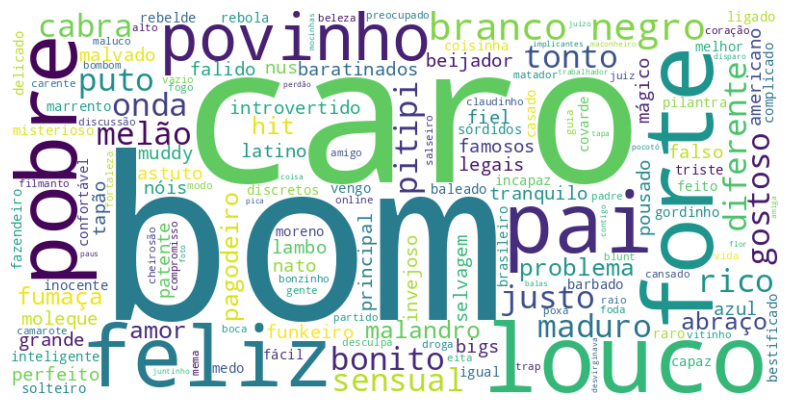

In [45]:
texto = ' '.join(listaMasc['Adjetivo'])
nuvem_palavras = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()


In [46]:
contagem_palavrasMasc = listaMasc['Adjetivo'].value_counts()
ranking_adjetivosMasc = contagem_palavrasMasc.reset_index()
ranking_adjetivosMasc.columns = ['Adjetivo', 'Frequência']
ranking_adjetivosMasc.head(10)

,Adjetivo,Frequência
0,bom,7
1,caro,5
2,louco,4
3,forte,4
4,pobre,3
5,povinho,3
6,negro,3
7,pai,3
8,branco,3
9,feliz,3


In [47]:
genero_e_palavrasMasc = resultados_masculino[['ID', 'Gênero Musical']].merge(listaMasc, on='ID', how='left')
genero_e_palavrasMasc = genero_e_palavrasMasc.dropna(subset=['Adjetivo'])
contagem_por_generoMasc = genero_e_palavrasMasc.groupby(['Gênero Musical', 'Adjetivo']).size().reset_index(name='Frequência')

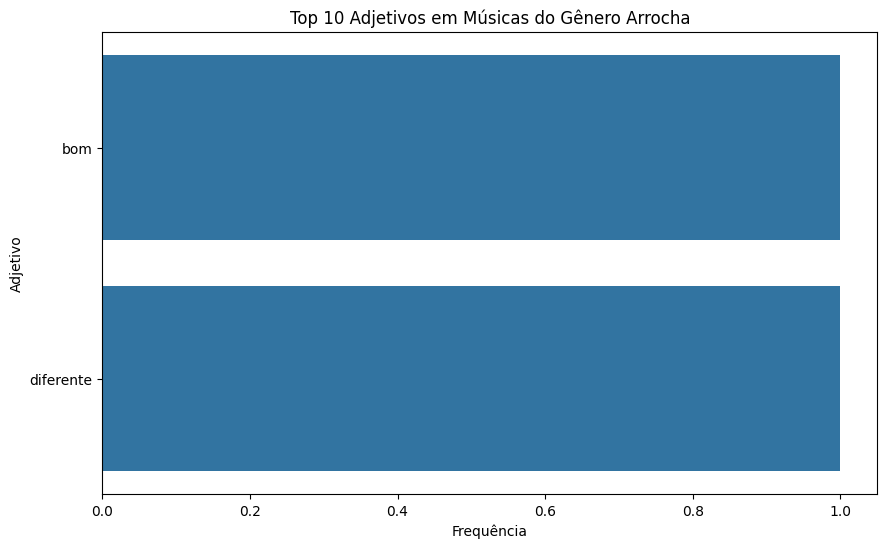

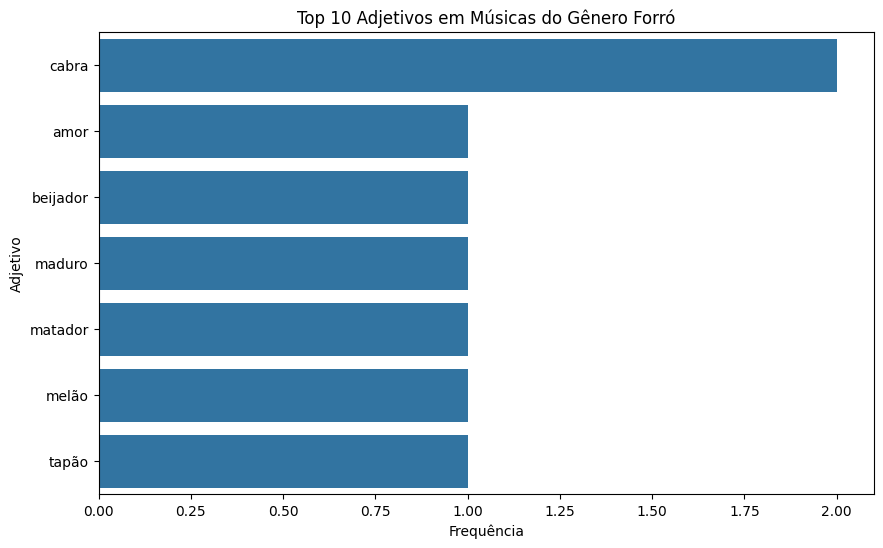

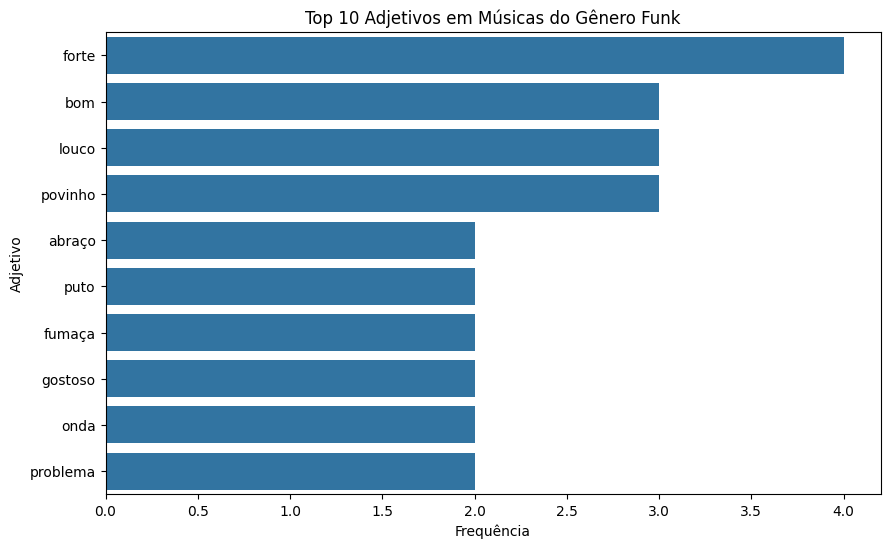

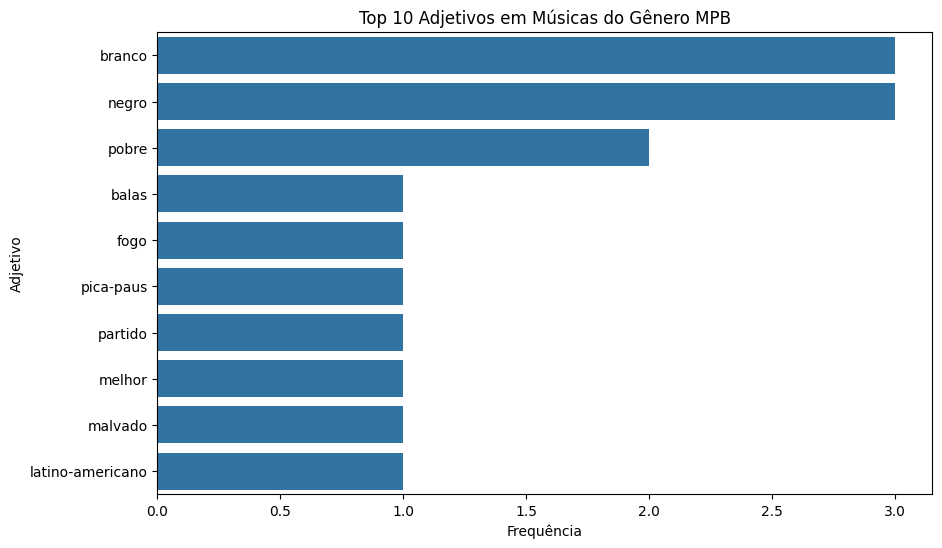

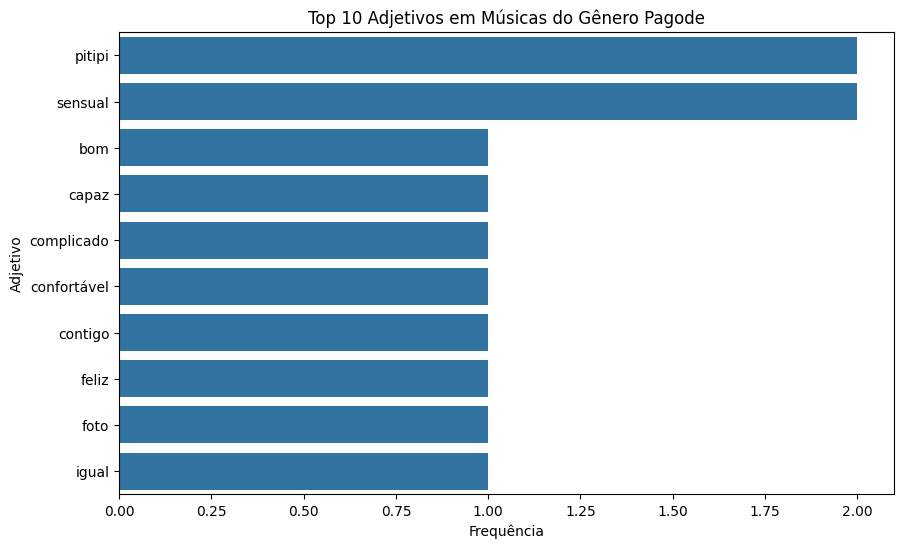

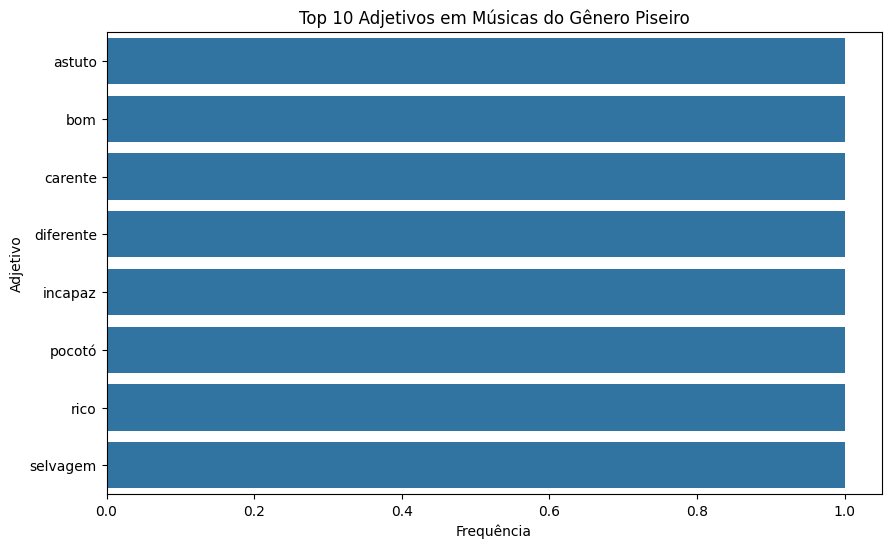

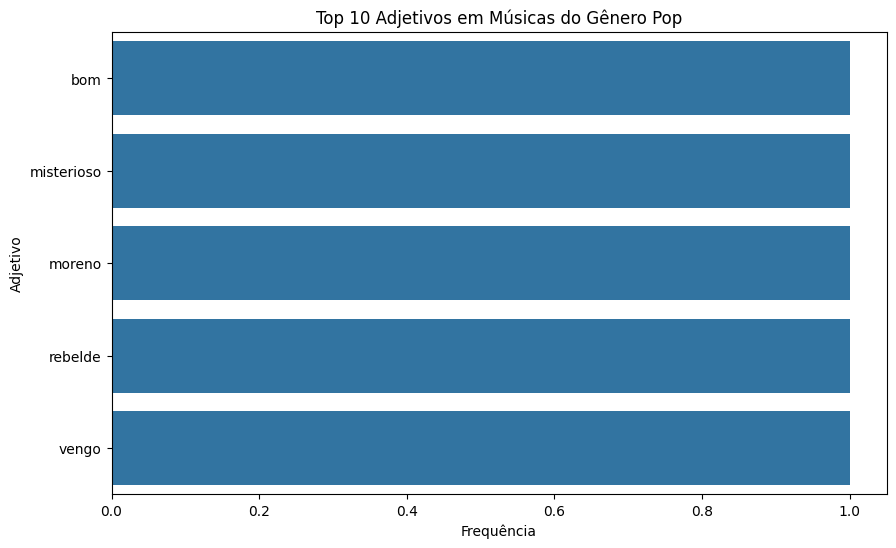

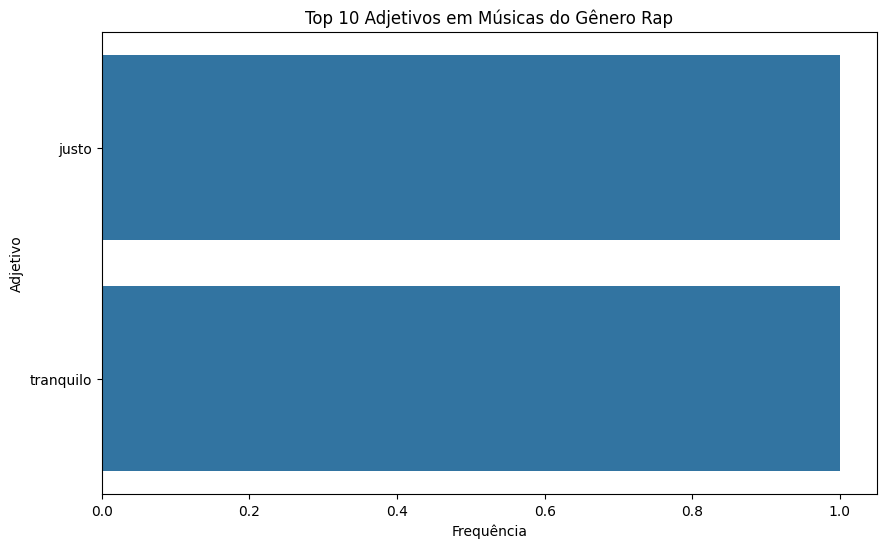

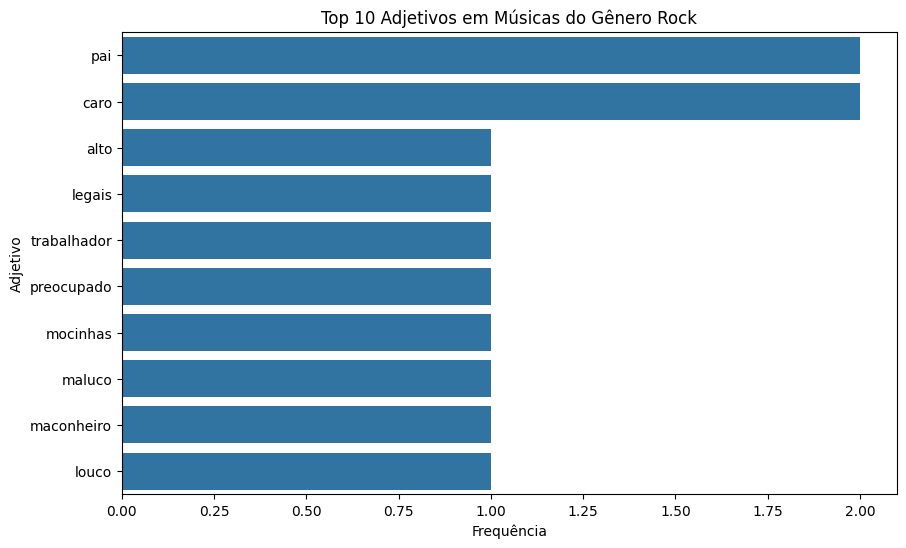

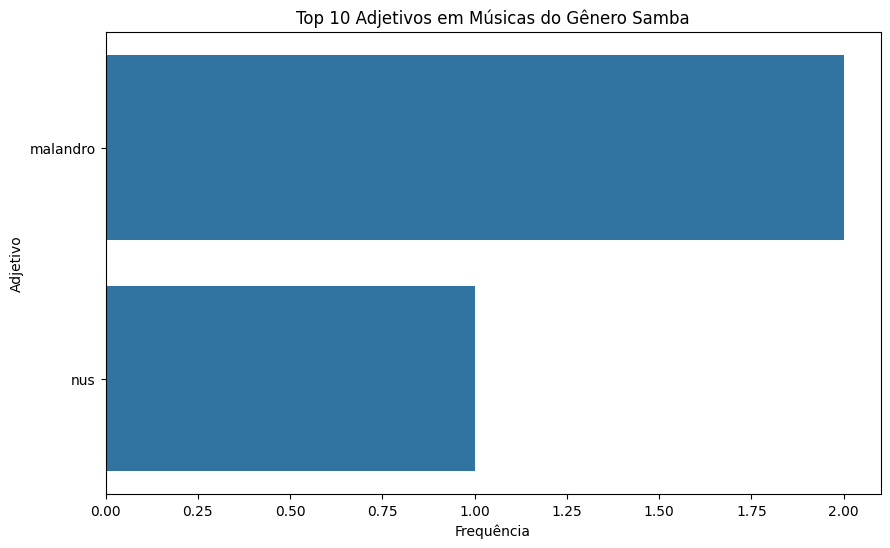

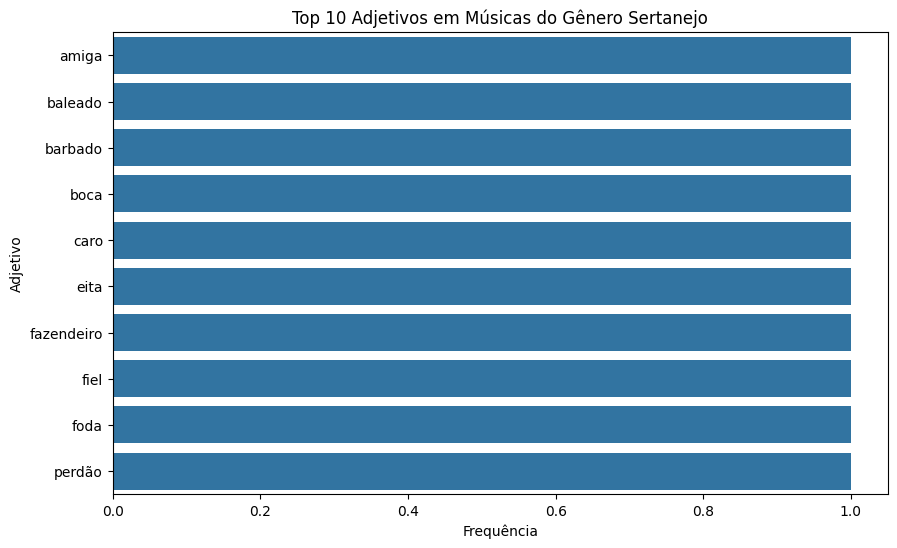

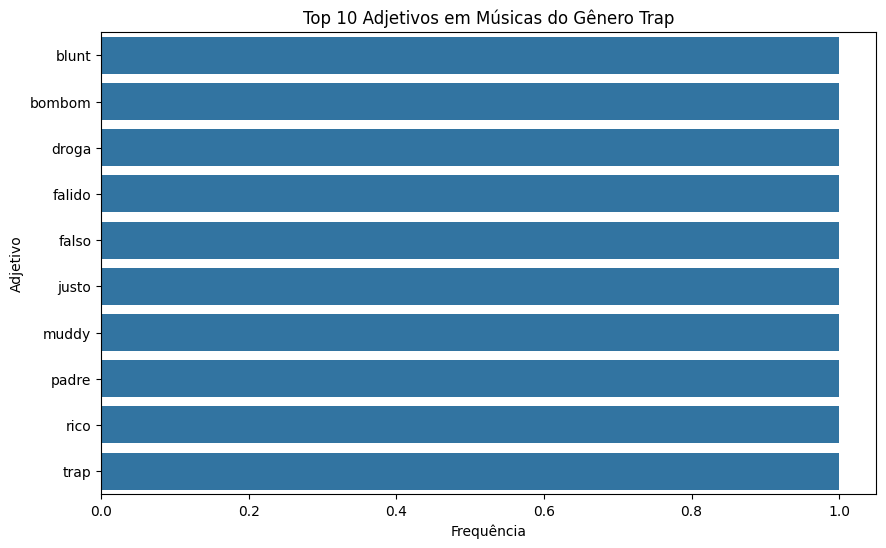

In [48]:
generosMasc = contagem_por_generoMasc['Gênero Musical'].unique()

for genero in generosMasc:
    dados_generoMasc = contagem_por_generoMasc[contagem_por_generoMasc['Gênero Musical'] == genero]
    dados_generoMasc = dados_generoMasc.sort_values(by='Frequência', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequência', y='Adjetivo', data=dados_generoMasc)
    plt.title(f'Top 10 Adjetivos em Músicas do Gênero {genero}')
    plt.xlabel('Frequência')
    plt.ylabel('Adjetivo')
    plt.show()